In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
import scipy.stats as ss
import numpy as np
from scipy.stats import pointbiserialr

warnings.filterwarnings('ignore')

In [19]:
train_df = pd.read_csv('../input/train/data_merged.csv', sep=';')
test_df = pd.read_csv('../input/test/data_merged.csv', sep=';')

df = pd.concat([train_df, test_df])
df.reset_index(drop=True, inplace=True)
df

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0.0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,...,Needs Improvement,Poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0.0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,...,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1.0,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,0.0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,...,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,1.0,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,...,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129976,99935598,NaN,Needs Improvement,Green Car,Excellent,Needs Improvement,Manageable,Acceptable,Needs Improvement,Acceptable,...,Good,Acceptable,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0
129977,99935599,NaN,Needs Improvement,Ordinary,Needs Improvement,Good,Needs Improvement,Acceptable,Excellent,Excellent,...,Good,Good,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0
129978,99935600,NaN,Good,Green Car,Extremely Poor,Good,Needs Improvement,Needs Improvement,Good,Poor,...,Excellent,Needs Improvement,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0
129979,99935601,NaN,Excellent,Ordinary,Excellent,Excellent,Inconvenient,Acceptable,Excellent,Good,...,Excellent,Good,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129981 entries, 0 to 129980
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       129981 non-null  int64  
 1   Overall_Experience       94379 non-null   float64
 2   Seat_Comfort             129898 non-null  object 
 3   Seat_Class               129981 non-null  object 
 4   Arrival_Time_Convenient  117726 non-null  object 
 5   Catering                 117883 non-null  object 
 6   Platform_Location        129939 non-null  object 
 7   Onboard_Wifi_Service     129939 non-null  object 
 8   Onboard_Entertainment    129955 non-null  object 
 9   Online_Support           129864 non-null  object 
 10  Ease_of_Online_Booking   129890 non-null  object 
 11  Onboard_Service          119508 non-null  object 
 12  Legroom                  129866 non-null  object 
 13  Baggage_Handling         129799 non-null  object 
 14  Chec

In [21]:
# List of categorical columns to plot
categorical_columns = [
    'Overall_Experience', 'Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Comfort',
    'Seat_Class', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
    'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
    'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling',
    'CheckIn_Service', 'Cleanliness', 'Online_Boarding'
]

In [22]:
for column in categorical_columns:
    df[column] = df[column].astype('category')

In [23]:
values_order1 = ['Extremely Poor', 'Poor', 'Needs Improvement', 'Acceptable', 'Good', 'Excellent']
values_order2 = ['Very Inconvenient', 'Inconvenient', 'Needs Improvement', 'Manageable', 'Convenient', 'Very Convenient']

In [24]:
ordinal_columns1 = ['Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 
                   'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling',
                   'CheckIn_Service', 'Cleanliness', 'Online_Boarding']

ordinal_columns2 = ['Platform_Location']

In [25]:
for column in ordinal_columns1:
    df[column] = pd.Categorical(df[column], categories=values_order1, ordered=True)

for column in ordinal_columns2:
    df[column] = pd.Categorical(df[column], categories=values_order2, ordered=True)

In [26]:
numerical_columns = ['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']

In [27]:
# Initialize the label encoder
label_encoder = LabelEncoder()
encoded_df = df.copy()

# Apply label encoding to all categorical columns
for col in categorical_columns:
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

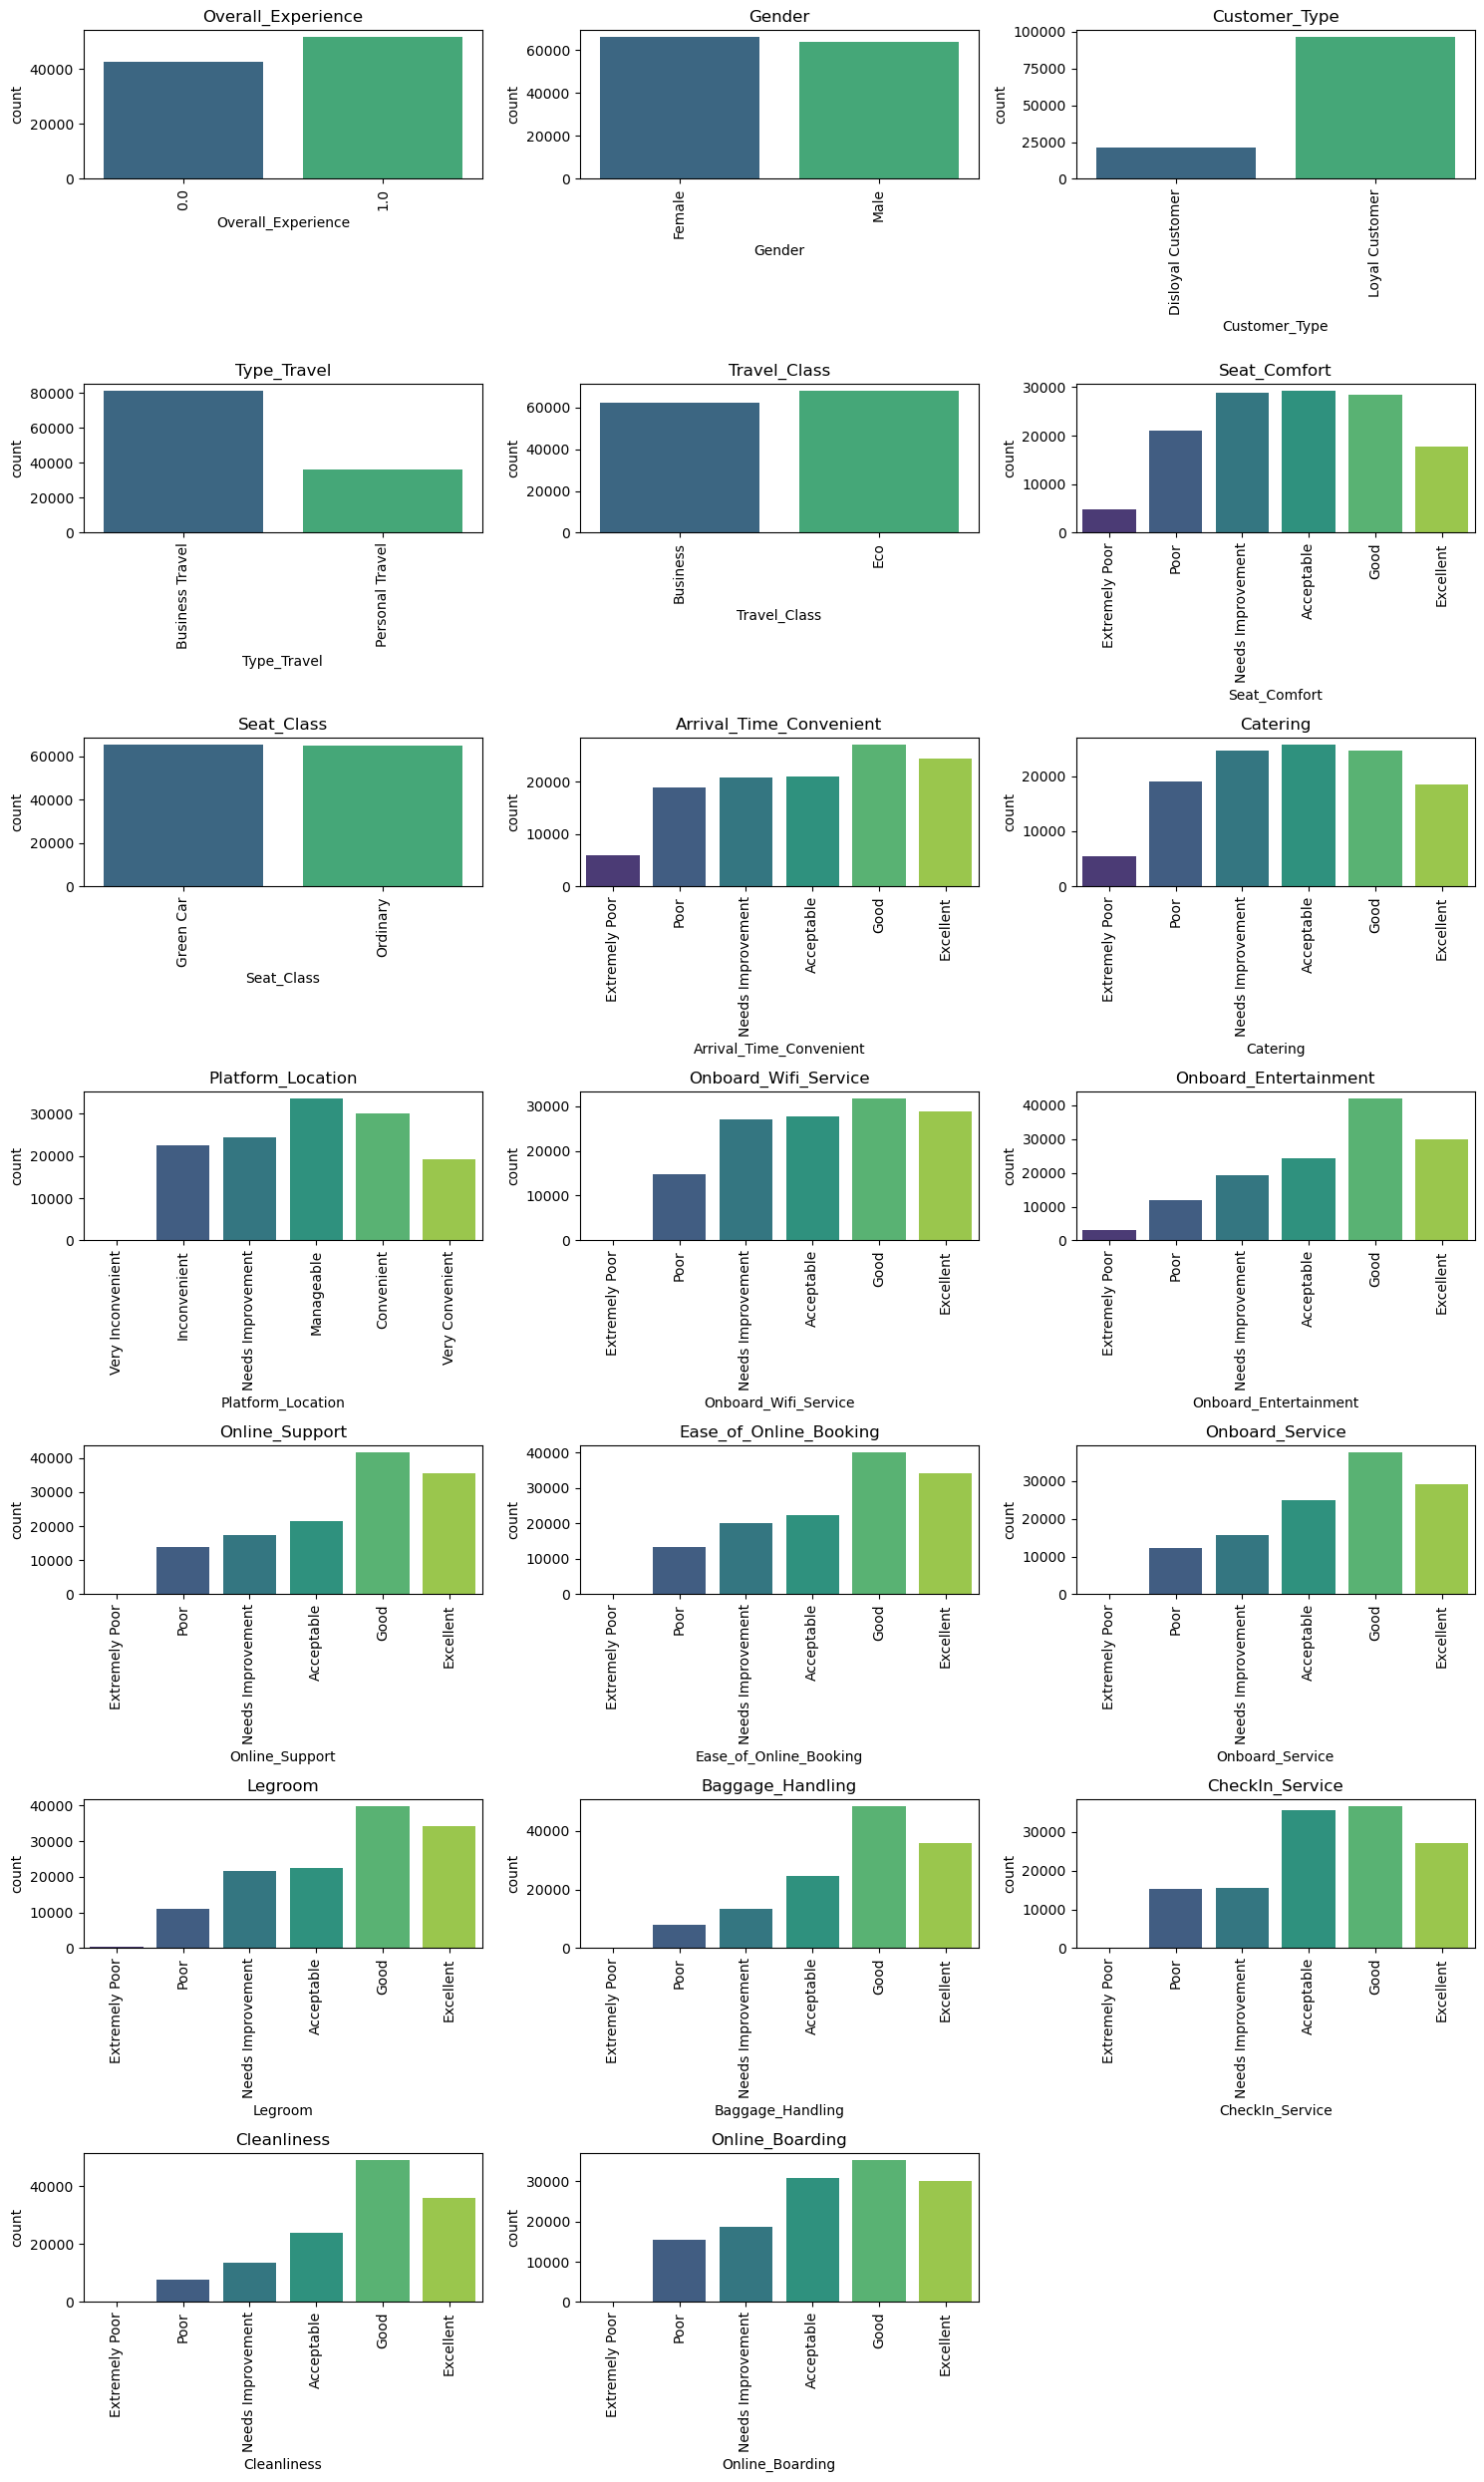

In [28]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 25))


# Plot the count distribution of each categorical variable
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(7, 3, i)

    if column in ordinal_columns1:
        sns.countplot(data=df, x=column, palette='viridis', order=values_order1)

    elif column in ordinal_columns2:
        sns.countplot(data=df, x=column, palette='viridis', order=values_order2)
        
    else:
        sns.countplot(data=df, x=column, palette='viridis')
    plt.title(column)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [29]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))    
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [30]:
def point_biserial(x, y):
    return pointbiserialr(x, y)[0]

In [31]:
all_columns = categorical_columns + numerical_columns

corr_matrix = pd.DataFrame(index=all_columns, columns=all_columns)

encoded_df.dropna(inplace=True)

# Calculate Cramér's V for categorical vs. categorical
for col1 in categorical_columns:
    for col2 in categorical_columns:
        corr_matrix.loc[col1, col2] = cramers_v(encoded_df[col1],encoded_df[col2])

# Calculate point-biserial for categorical vs. numerical
for cat_col in categorical_columns:
    for num_col in numerical_columns:
        corr_matrix.loc[cat_col, num_col] = point_biserial(encoded_df[cat_col], encoded_df[num_col])
        corr_matrix.loc[num_col, cat_col] = point_biserial(encoded_df[cat_col], encoded_df[num_col])

# Calculate Pearson for numerical vs. numerical
for col1 in numerical_columns:
    for col2 in numerical_columns:
        corr_matrix.loc[col1, col2] = encoded_df[[col1, col2]].corr().iloc[0, 1]

In [32]:
corr_matrix = corr_matrix.astype(float)

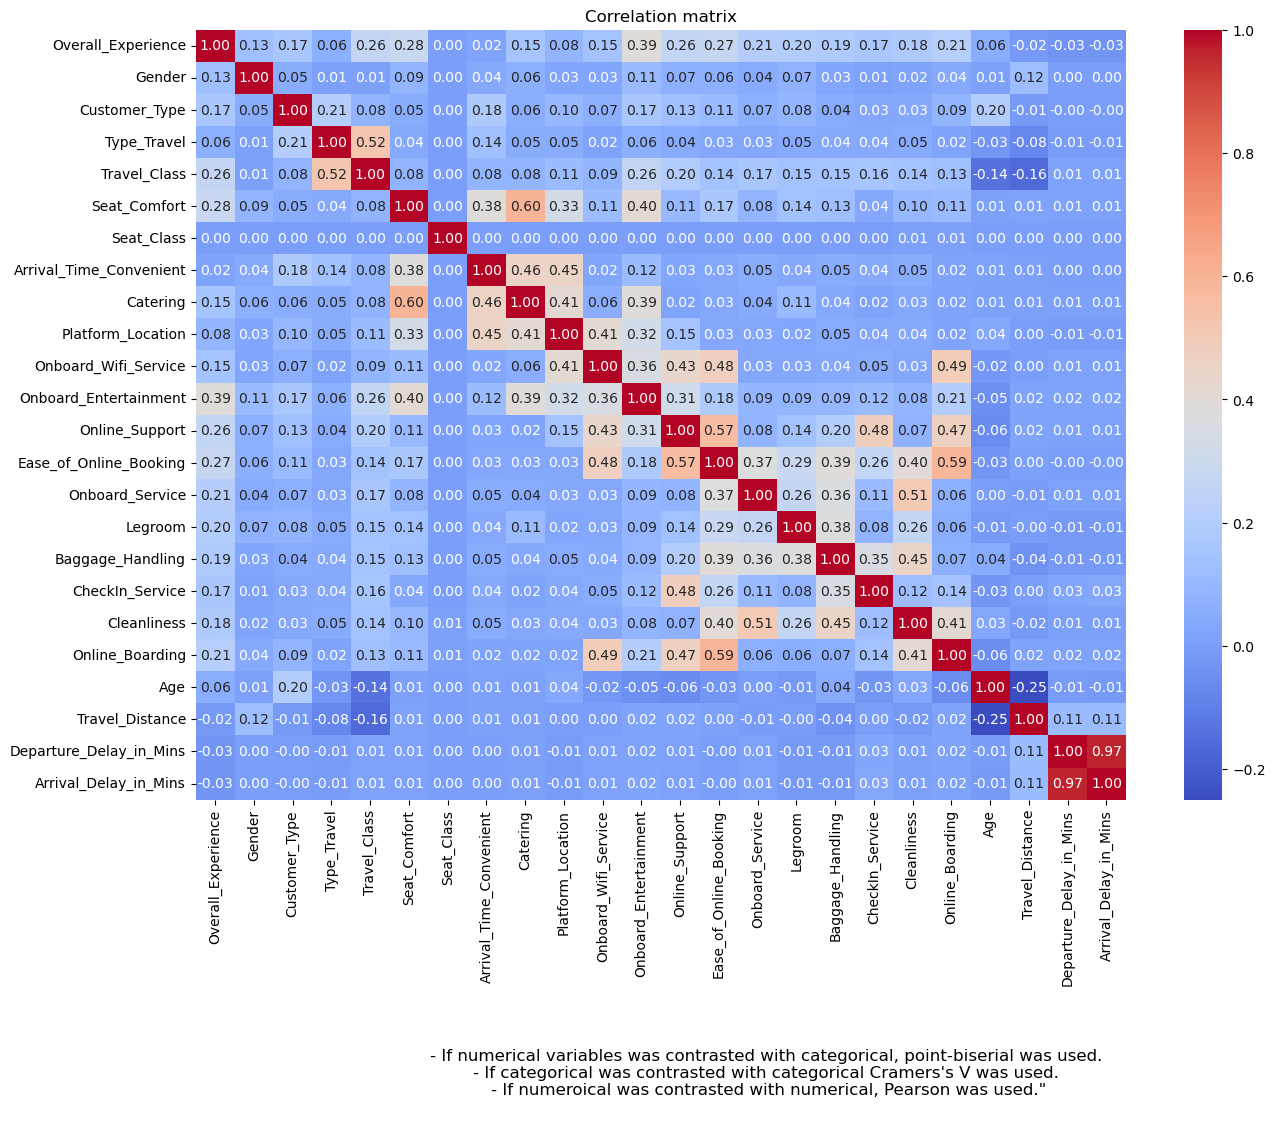

In [33]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation matrix")

caption = f'''
    - If numerical variables was contrasted with categorical, point-biserial was used. 
    - If categorical was contrasted with categorical Cramers's V was used. 
    - If numeroical was contrasted with numerical, Pearson was used."
'''

plt.figtext(0.5, -0.2, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

<h1> Imputing </h1>

In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from scipy.spatial.distance import hamming
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances

In [166]:
train_df = pd.read_csv('../input/train/data_merged.csv', sep=';')
test_df = pd.read_csv('../input/test/data_merged.csv', sep=';')

train_df['train_test'] = 'train'
test_df['train_test'] = 'test'

df = pd.concat([train_df, test_df])
df.reset_index(drop=True, inplace=True)
df

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,train_test
0,98800001,0.0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,...,Poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,train
1,98800002,0.0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,...,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,train
2,98800003,1.0,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,...,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,train
3,98800004,0.0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,...,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,train
4,98800005,1.0,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,...,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129976,99935598,NaN,Needs Improvement,Green Car,Excellent,Needs Improvement,Manageable,Acceptable,Needs Improvement,Acceptable,...,Acceptable,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0,test
129977,99935599,NaN,Needs Improvement,Ordinary,Needs Improvement,Good,Needs Improvement,Acceptable,Excellent,Excellent,...,Good,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0,test
129978,99935600,NaN,Good,Green Car,Extremely Poor,Good,Needs Improvement,Needs Improvement,Good,Poor,...,Needs Improvement,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0,test
129979,99935601,NaN,Excellent,Ordinary,Excellent,Excellent,Inconvenient,Acceptable,Excellent,Good,...,Good,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0,test


<Axes: >

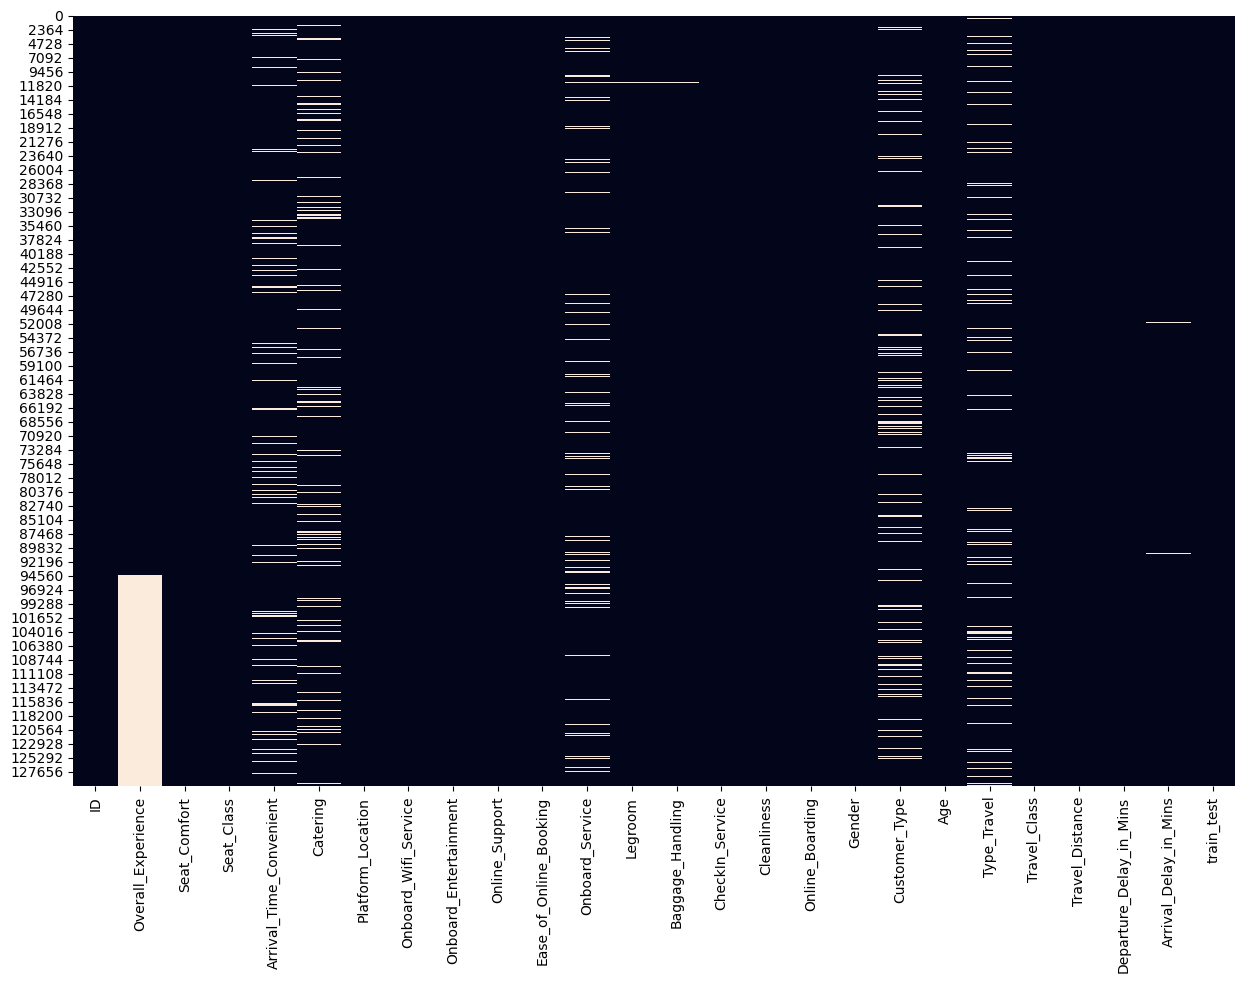

In [167]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull(), cbar=False)

<h2> Numerical imputations </h2>

In [168]:
# Mean imputation for numerical columns
mean_imputed_data = df.copy()
for col in mean_imputed_data.select_dtypes(include=[np.number]).columns:
    mean_imputed_data[col].fillna(mean_imputed_data[col].mean(), inplace=True)

In [169]:
def plot_distributions(original_data, imputed_data, columns, method_name):
    for col in columns:

        fig, ax = plt.subplots(1, 2, figsize=(20, 5))
        fig.suptitle(f'Comparing distribution original vs imputed for {col}', fontsize=15)

        ax[0].hist(original_data[col].dropna(), bins=20, color='blue')
        ax[0].set_title('Original distribution')
        
        ax[1].hist(imputed_data[col].dropna(), bins=20, color='red')
        ax[1].set_title('Imputed distribution')
        plt.show()

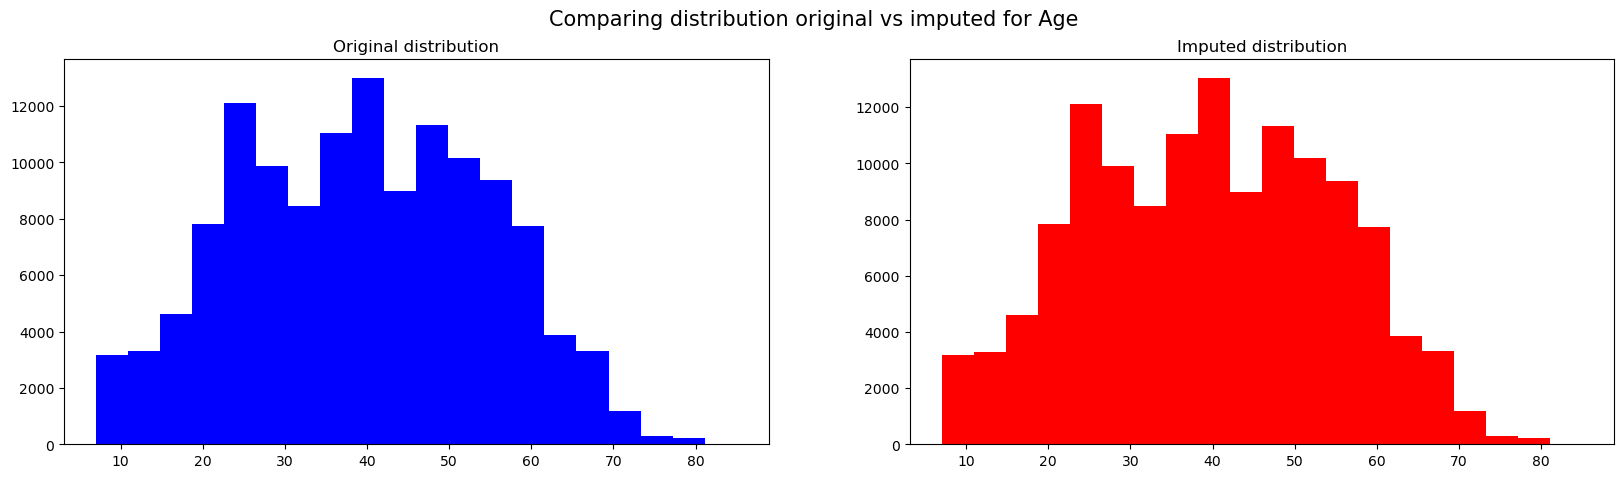

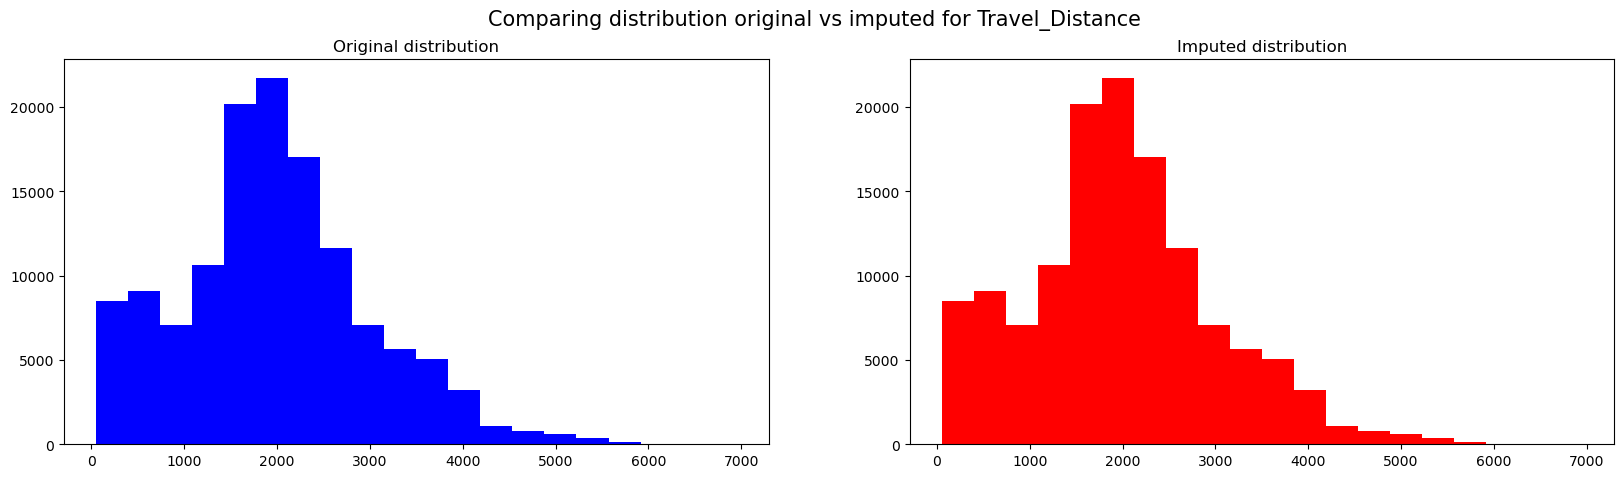

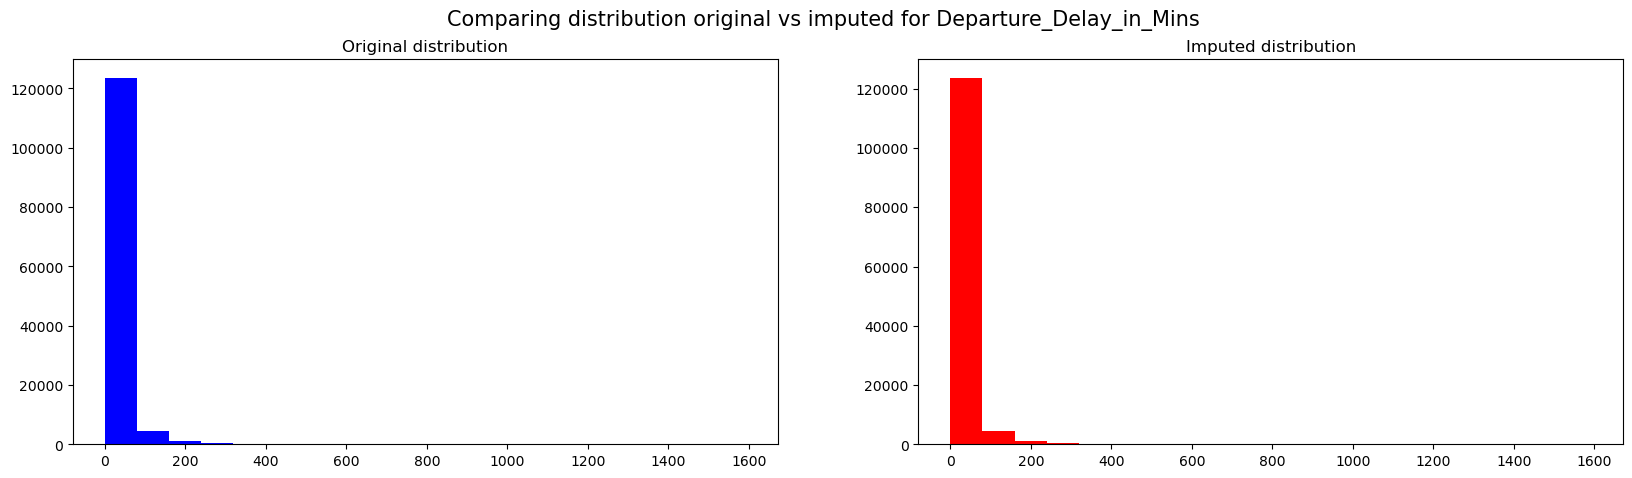

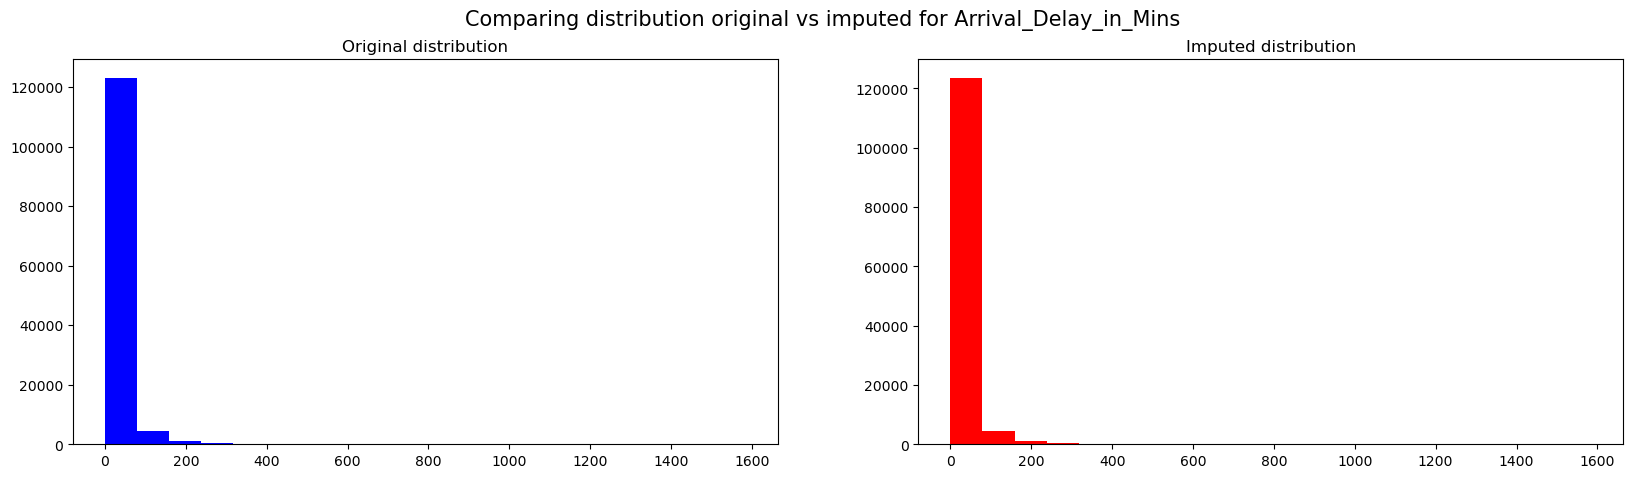

In [170]:
# Specify columns to plot
columns_to_plot = numerical_columns  # You can also include some categorical columns if you want

# Plot distributions for mean imputed data
plot_distributions(df, mean_imputed_data, columns_to_plot, 'Mean Imputed')

<h2> KNN Imputer </h2>

In [171]:
# K-Nearest Neighbors (KNN) Imputation
# Convert categorical columns to numerical codes for KNN imputation
label_encoder = LabelEncoder()
knn_imputed_data = df.copy()
knn_imputed_data.drop('train_test', axis=1, inplace=True)

In [172]:
# Encode categorical columns to numerical codes for KNN imputation
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    knn_imputed_data[col] = le.fit_transform(knn_imputed_data[col].astype(str).fillna('MISSING'))
    label_encoders[col] = le

In [173]:
# Apply KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputed_array = knn_imputer.fit_transform(knn_imputed_data)
knn_imputed_data = pd.DataFrame(knn_imputed_array, columns=[knn_imputed_data.columns])

In [174]:
# Round to nearest valid category and convert back to original categories
for col in categorical_columns:
    knn_imputed_data[col] = np.round(knn_imputed_data[col]).astype(int)
    le = label_encoders[col]
    # Handle the case where 'MISSING' label is included in the inverse_transform
    if 'nan' in le.classes_:
        classes = le.classes_.tolist()
        classes.remove('nan')
        le.classes_ = np.array(classes)
    knn_imputed_data[col] = le.inverse_transform(knn_imputed_data[col].clip(0, len(le.classes_) - 1))

In [175]:
knn_imputed_data.columns = df.drop('train_test', axis=1).columns

In [176]:
def plot_categorical_distribution(original_data, imputed_data, columns, method_name):
    for col in columns:

        # Original data relative frequencies
        original_counts = original_data[col].value_counts(normalize=True)
        original_values = original_counts.index
        original_frequencies = original_counts.values

        # Imputed data relative frequencies
        imputed_counts = imputed_data[col].value_counts(normalize=True)
        imputed_values = imputed_counts.index
        imputed_frequencies = imputed_counts.values

        fig, ax = plt.subplots(1, 2, figsize=(20, 5))

        fig.suptitle(f'Comparing distribution original vs imputed for {col}')
        
        ax[0].bar(original_values, original_frequencies, color='blue', alpha=0.5, label='Original')      
        ax[0].set_title('Original distribution')
        ax[1].bar(imputed_values, imputed_frequencies, color='red', alpha=0.5)
        ax[1].set_title('Imputed values')
        
        plt.show()

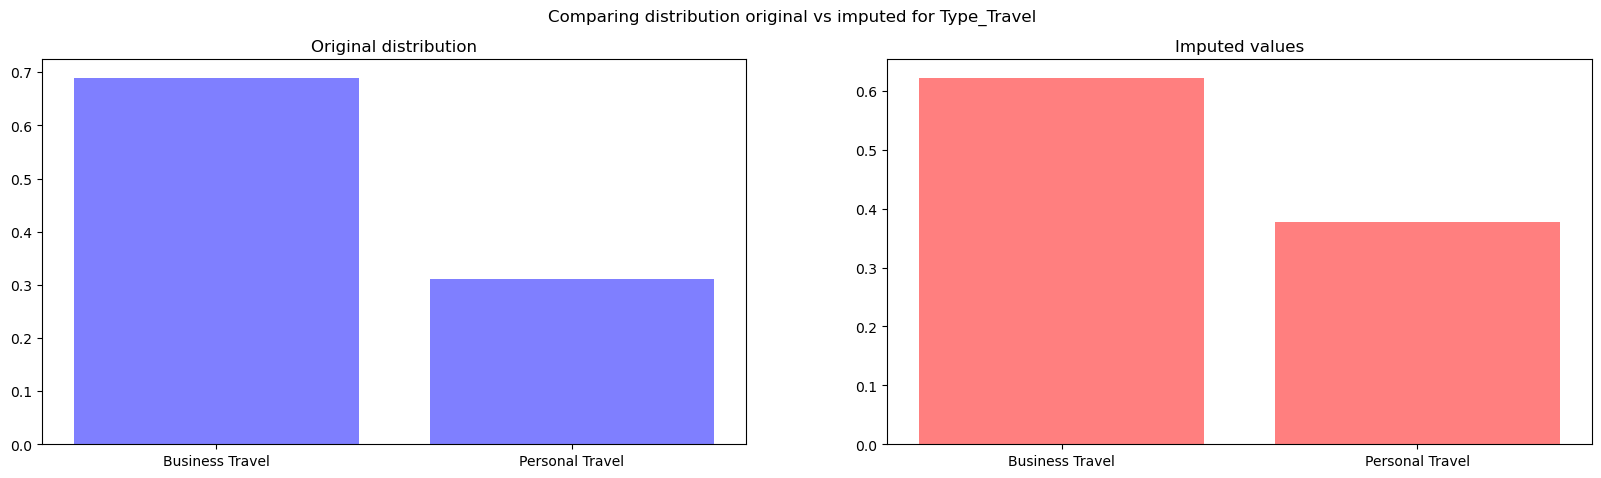

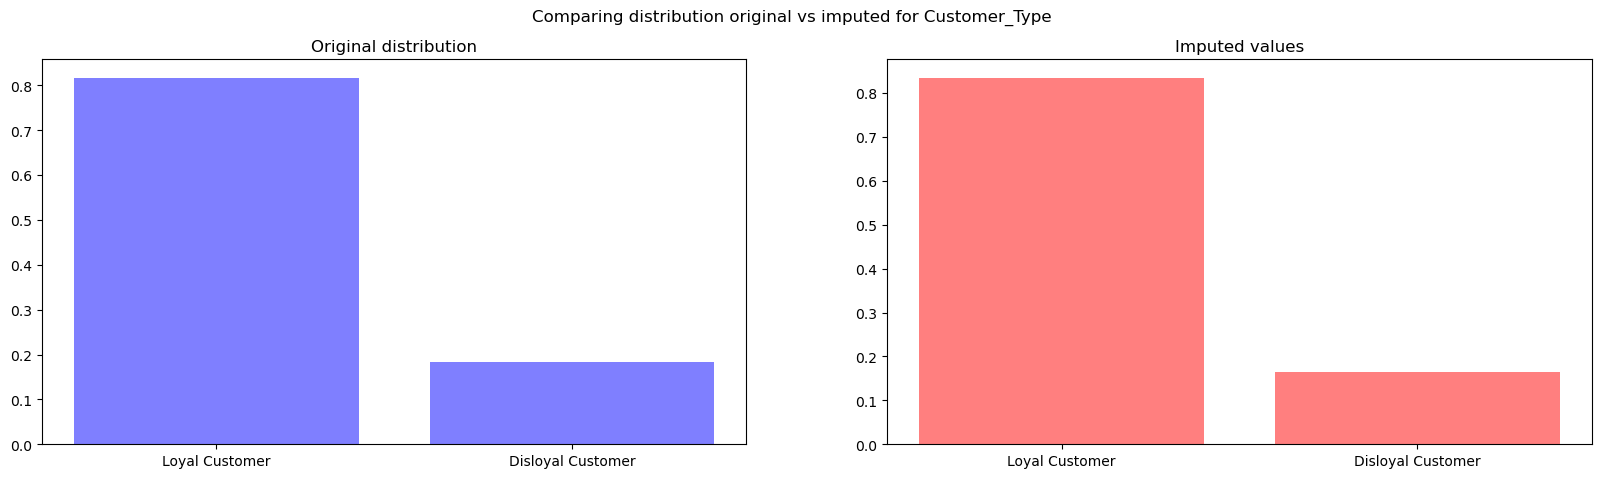

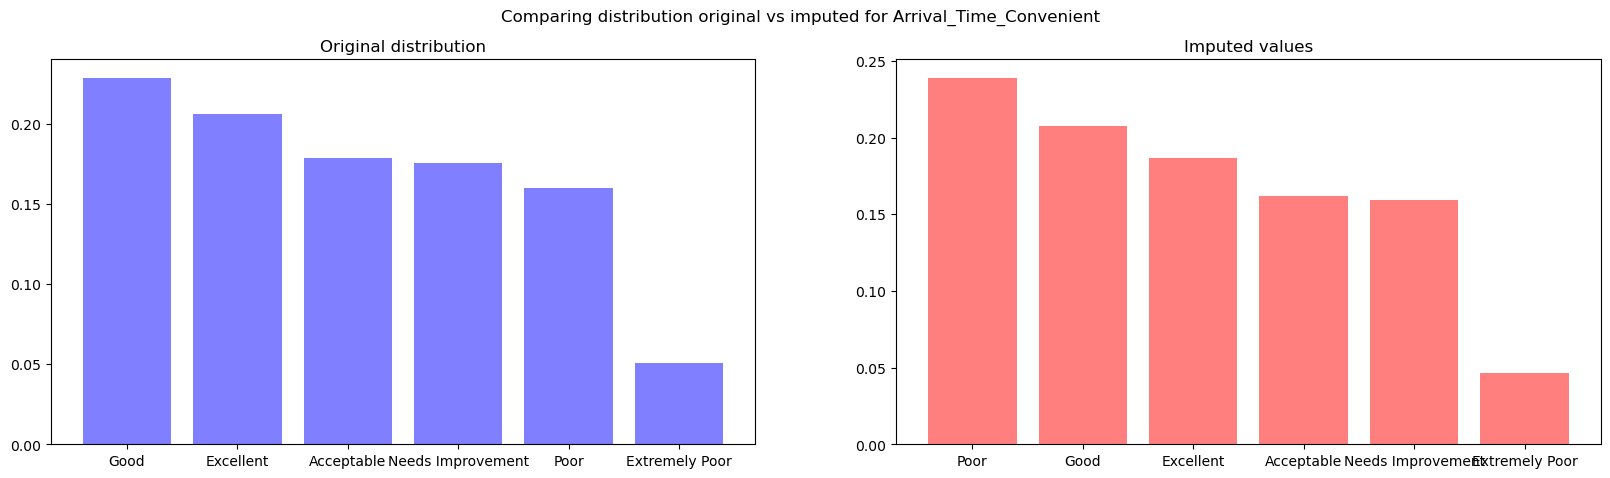

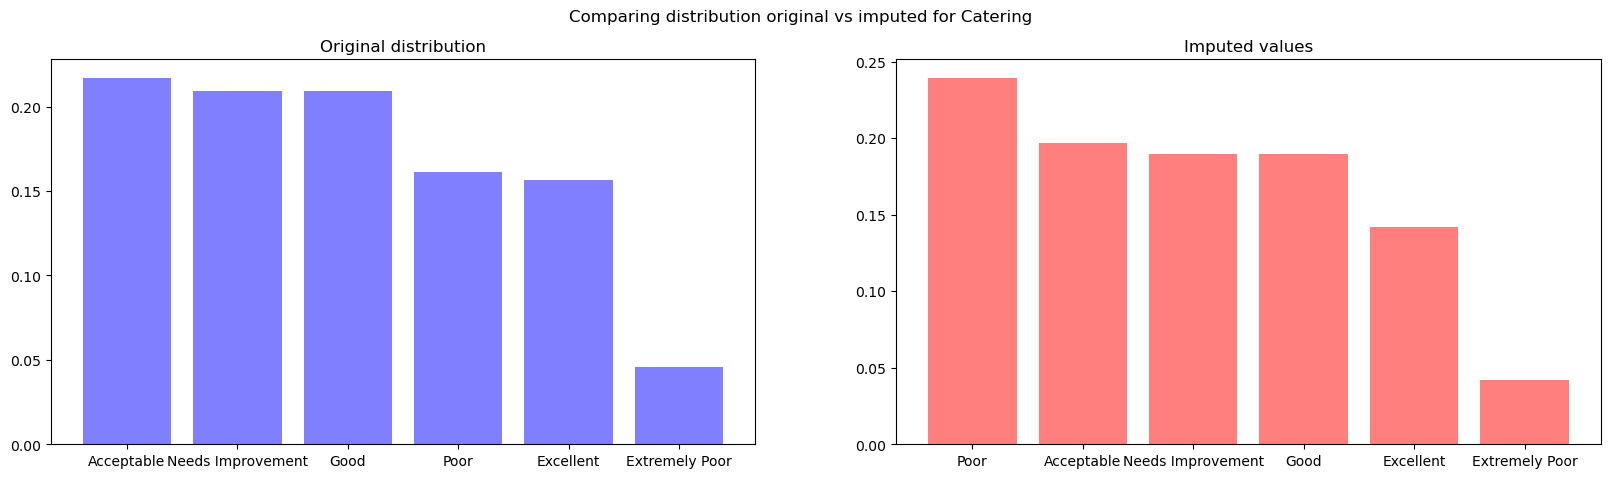

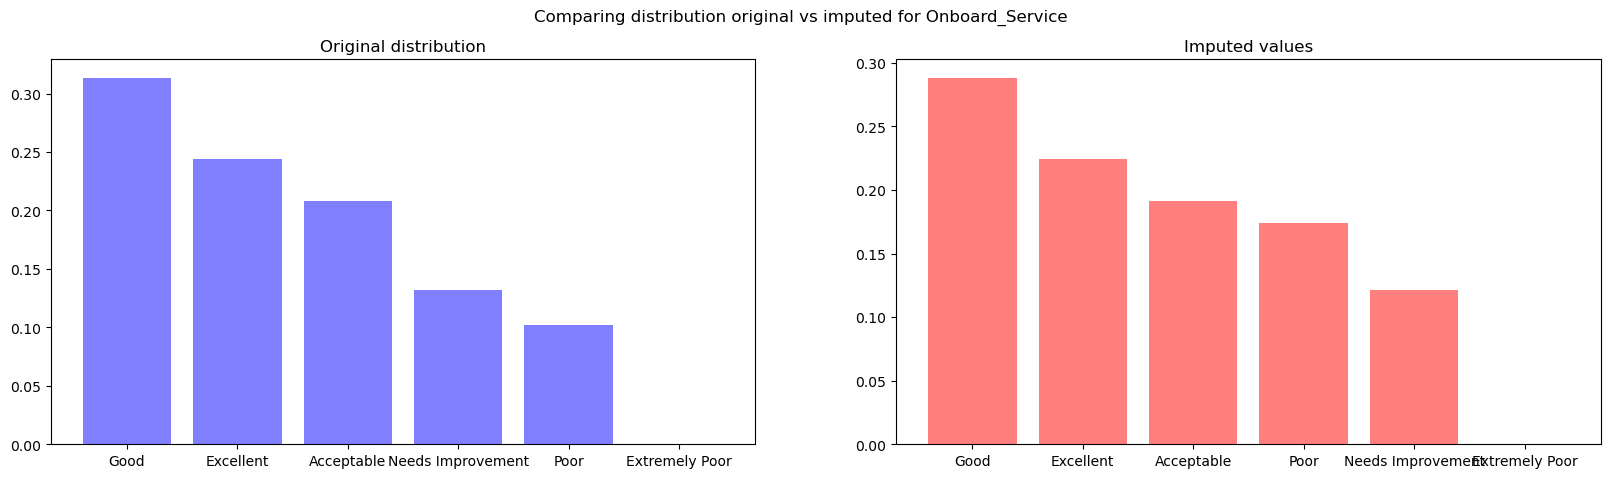

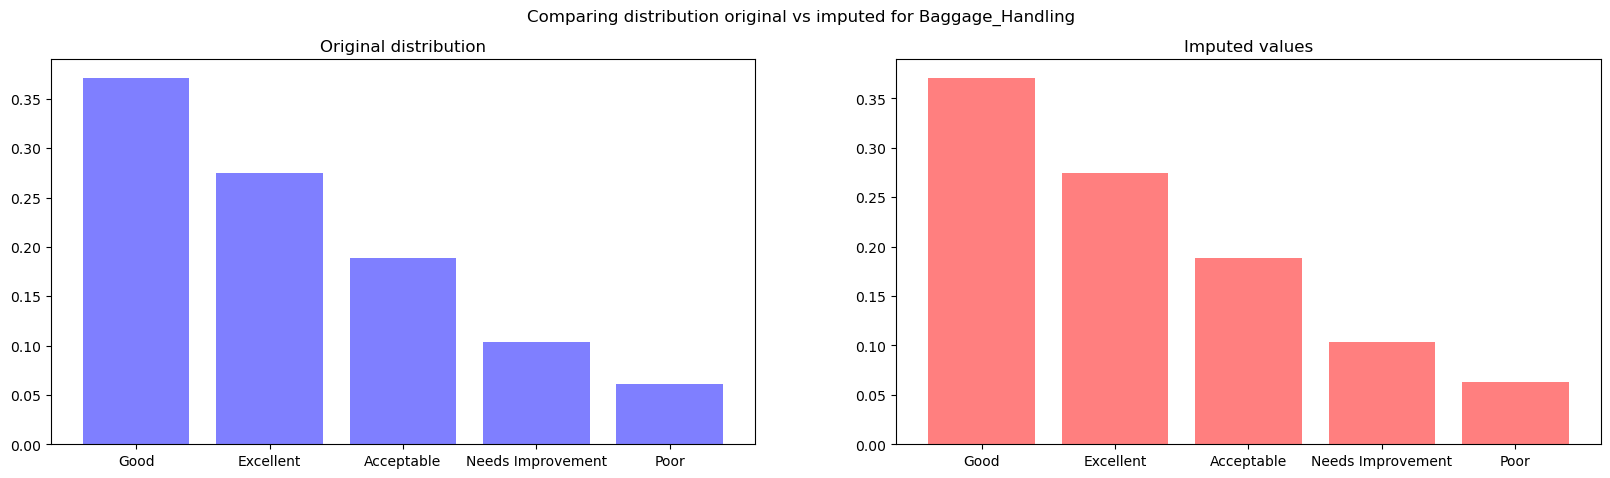

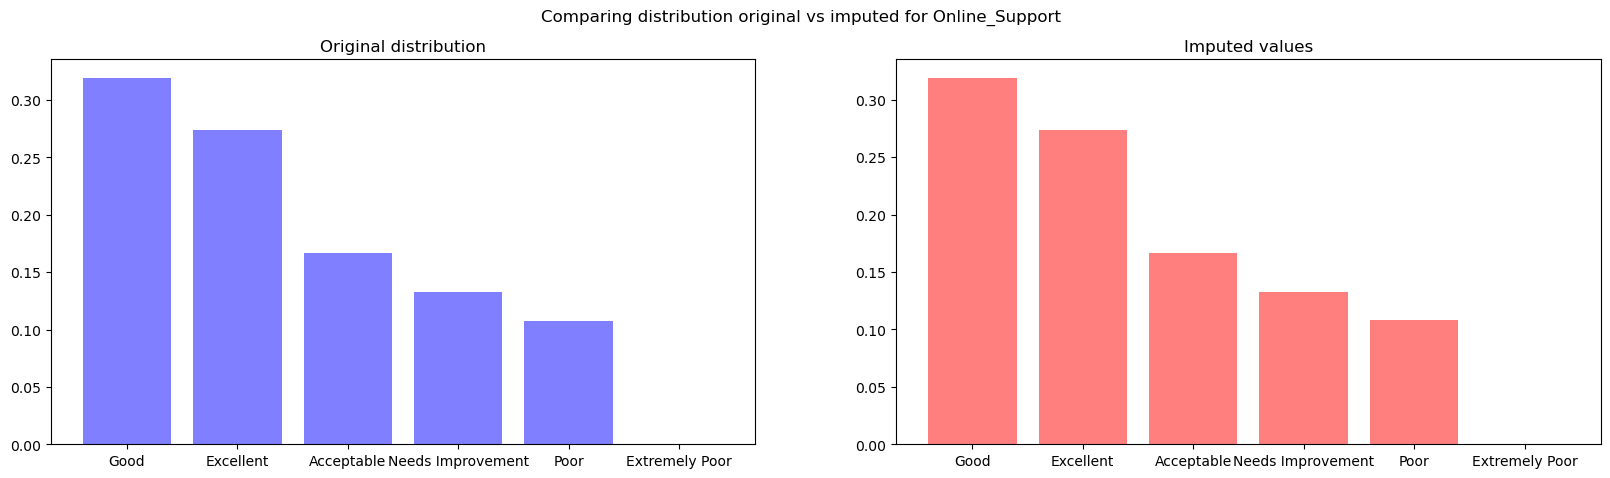

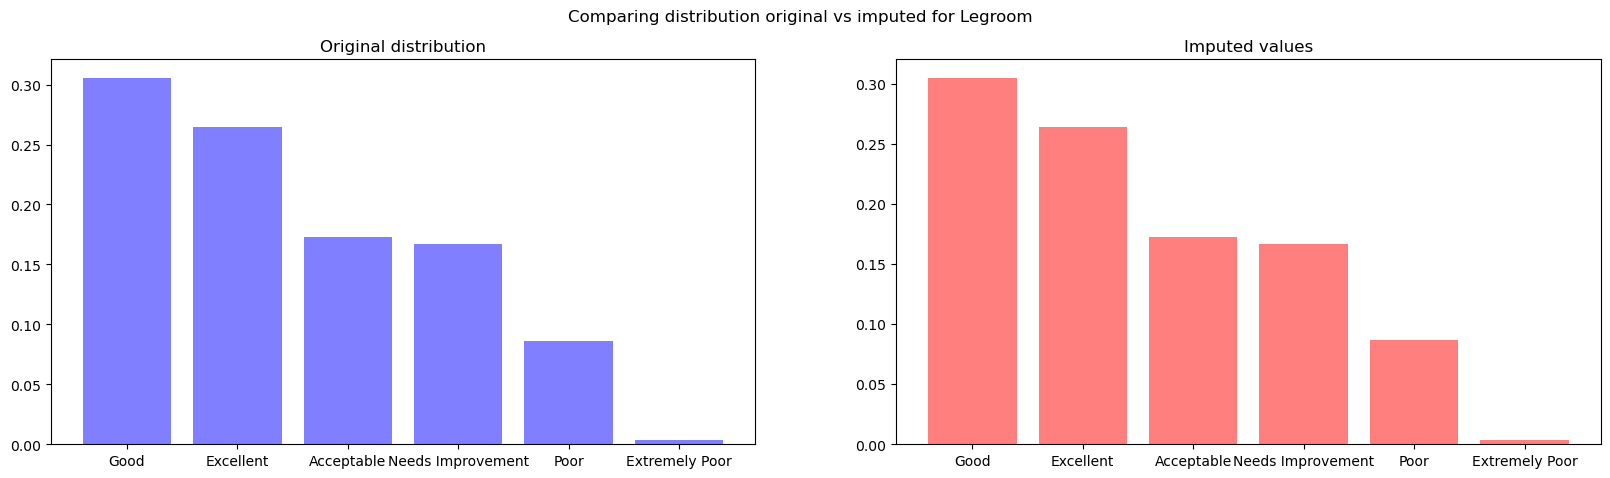

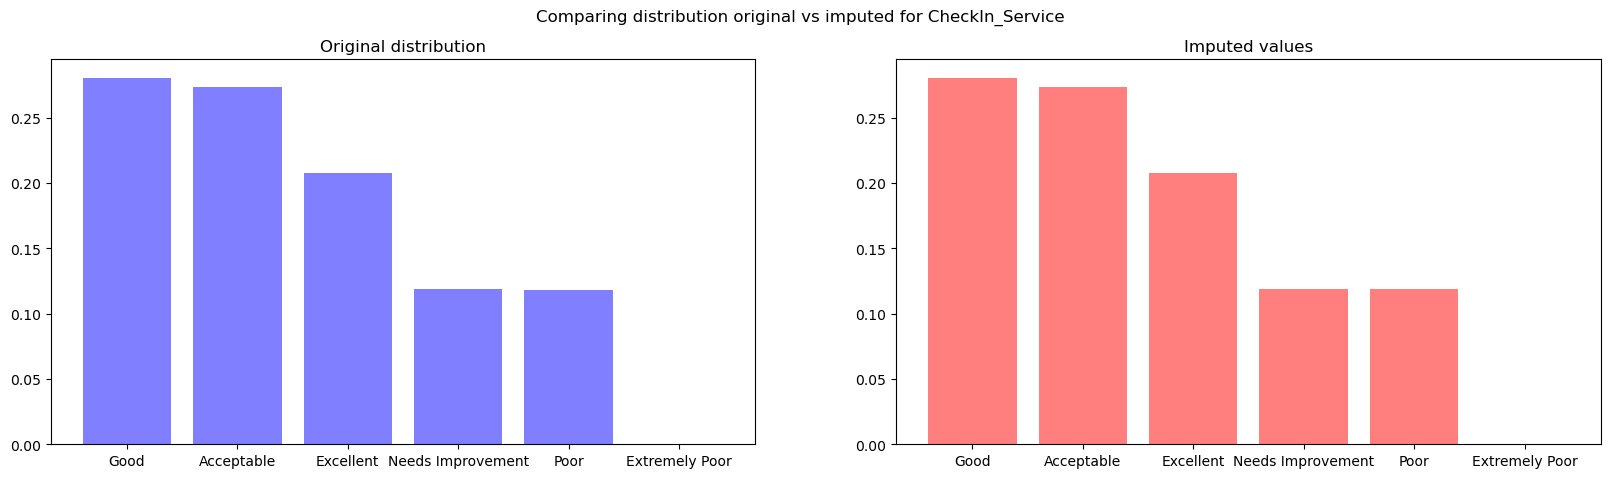

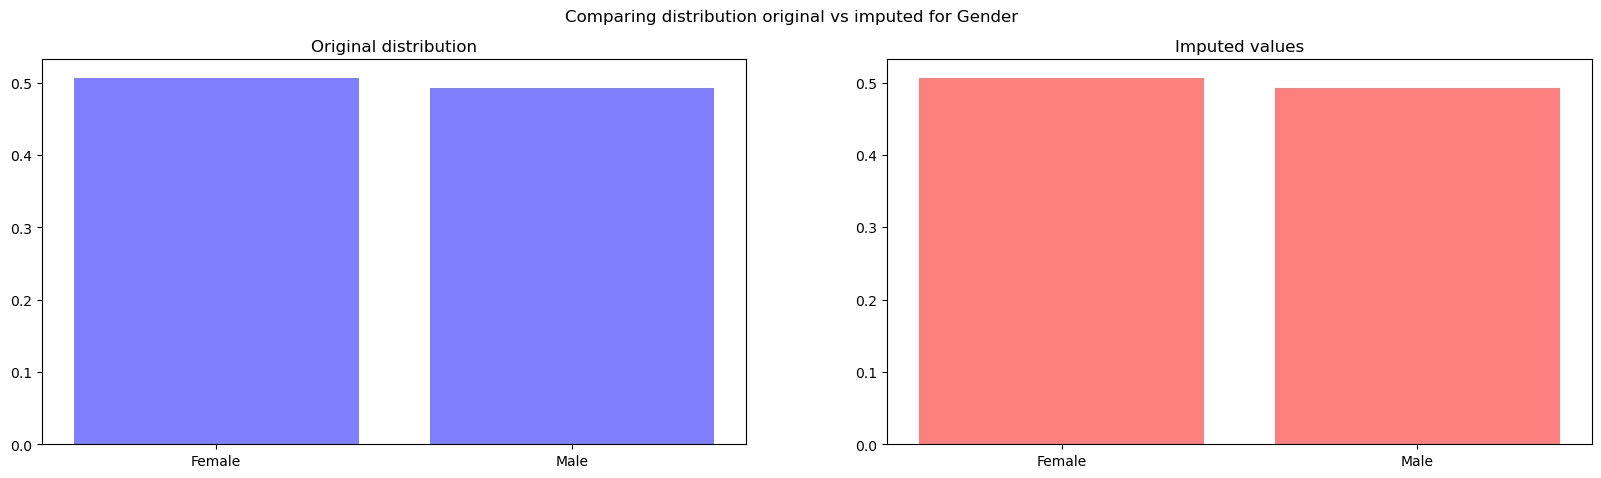

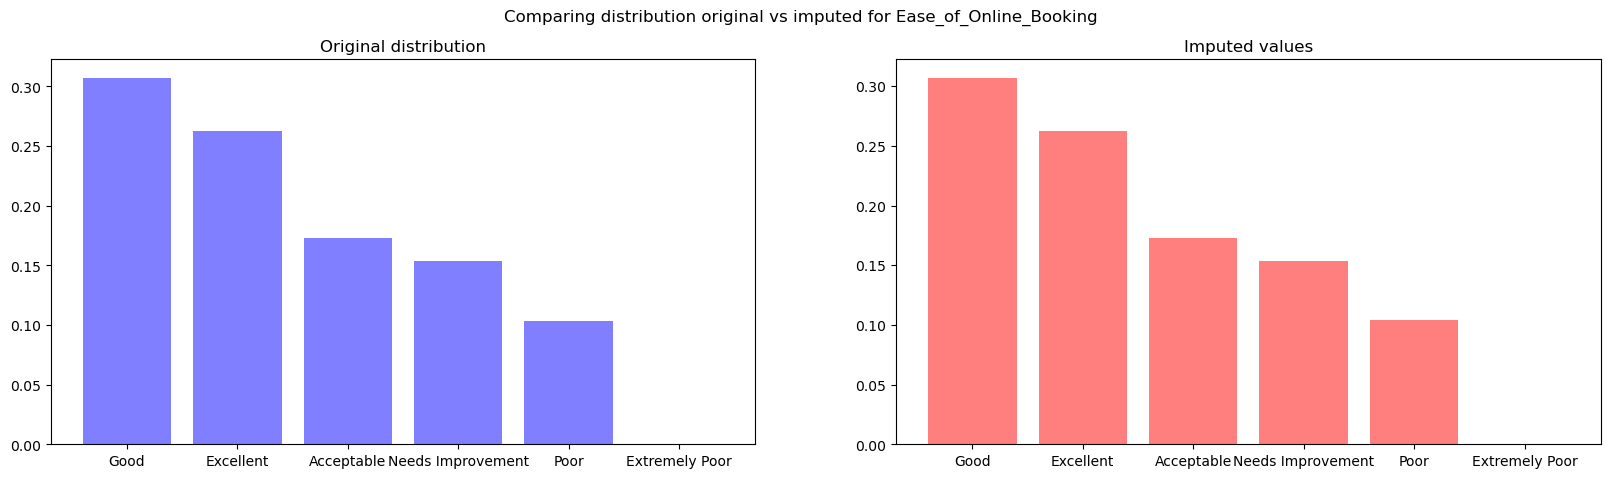

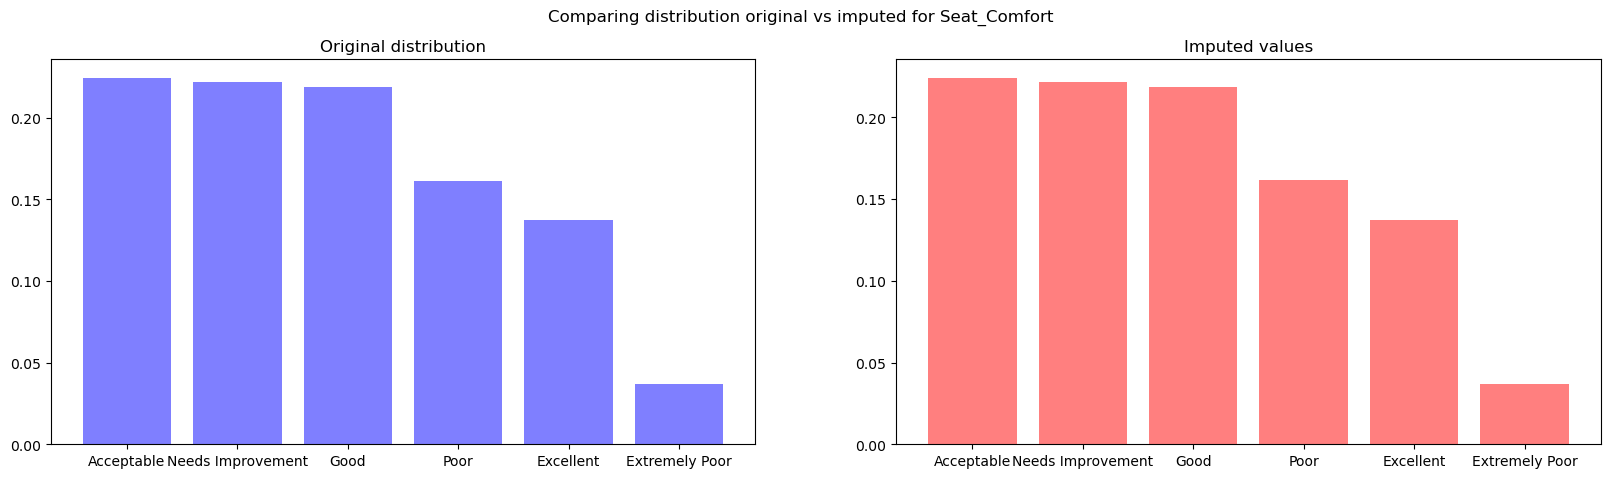

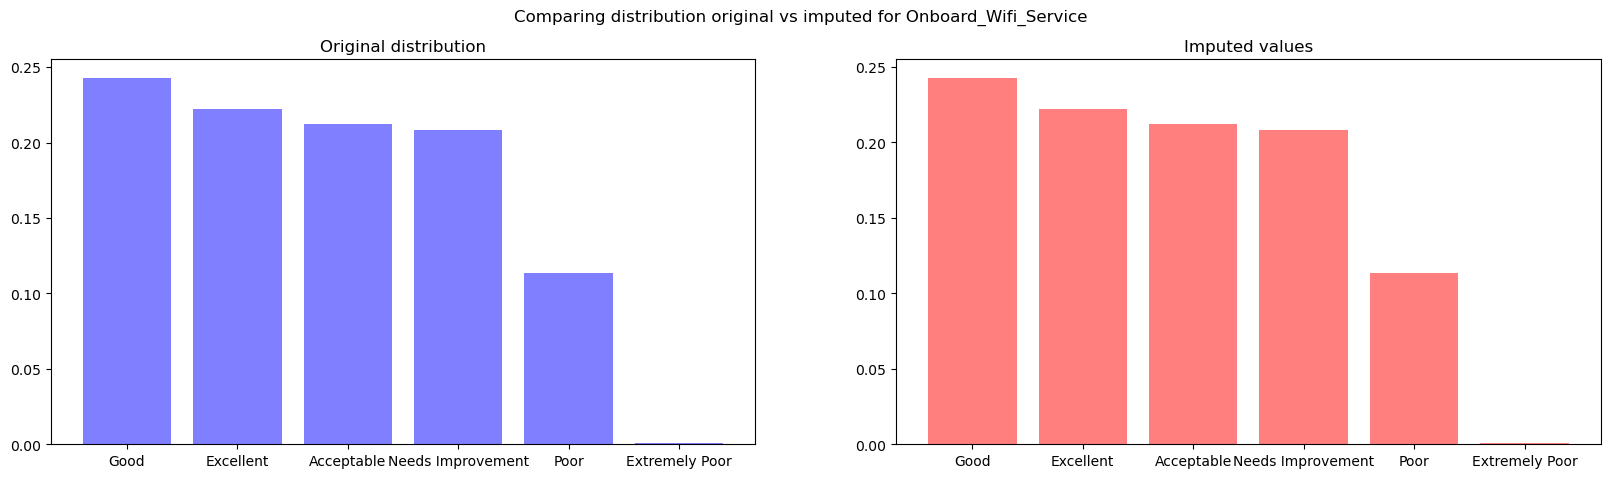

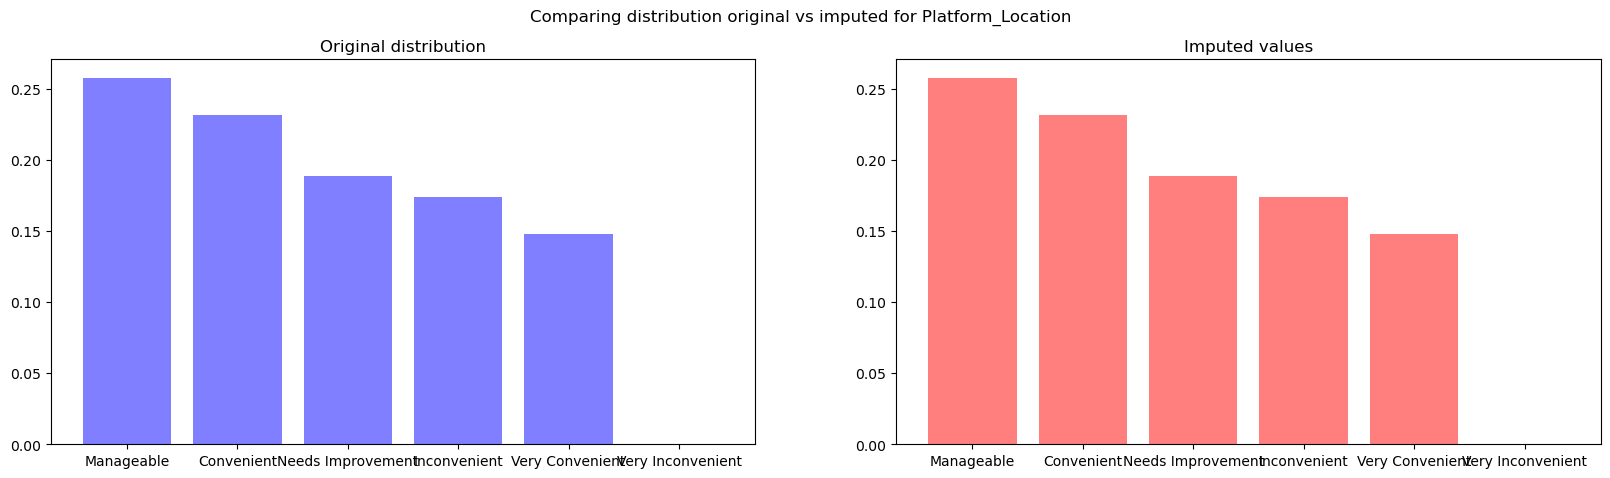

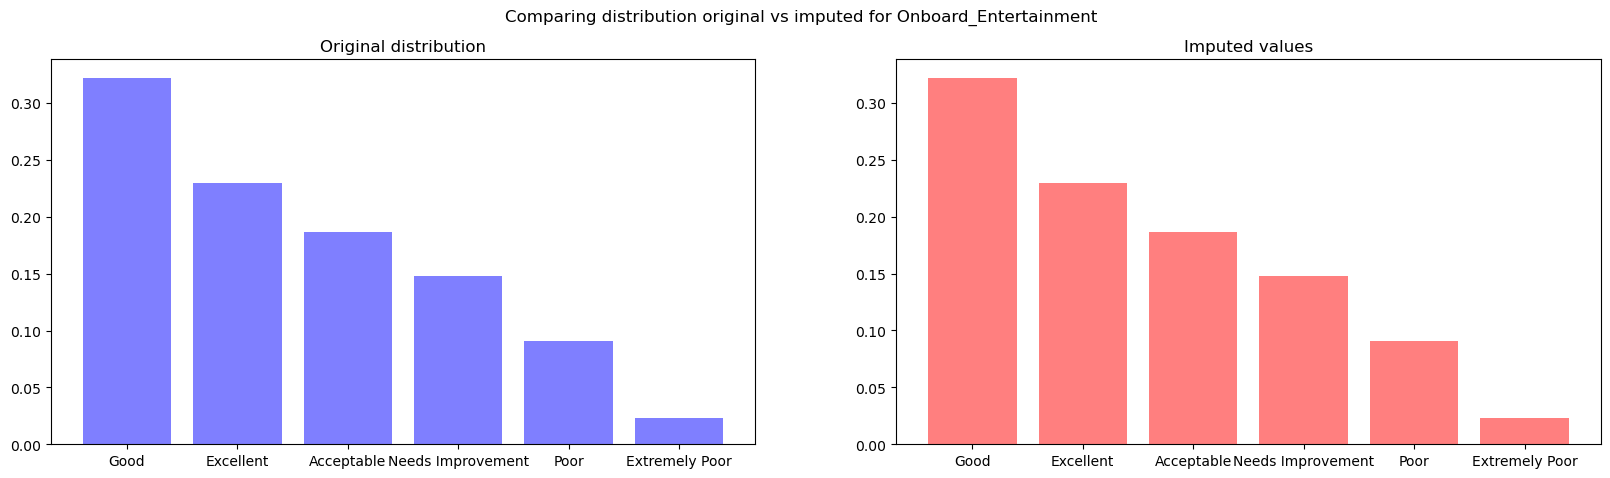

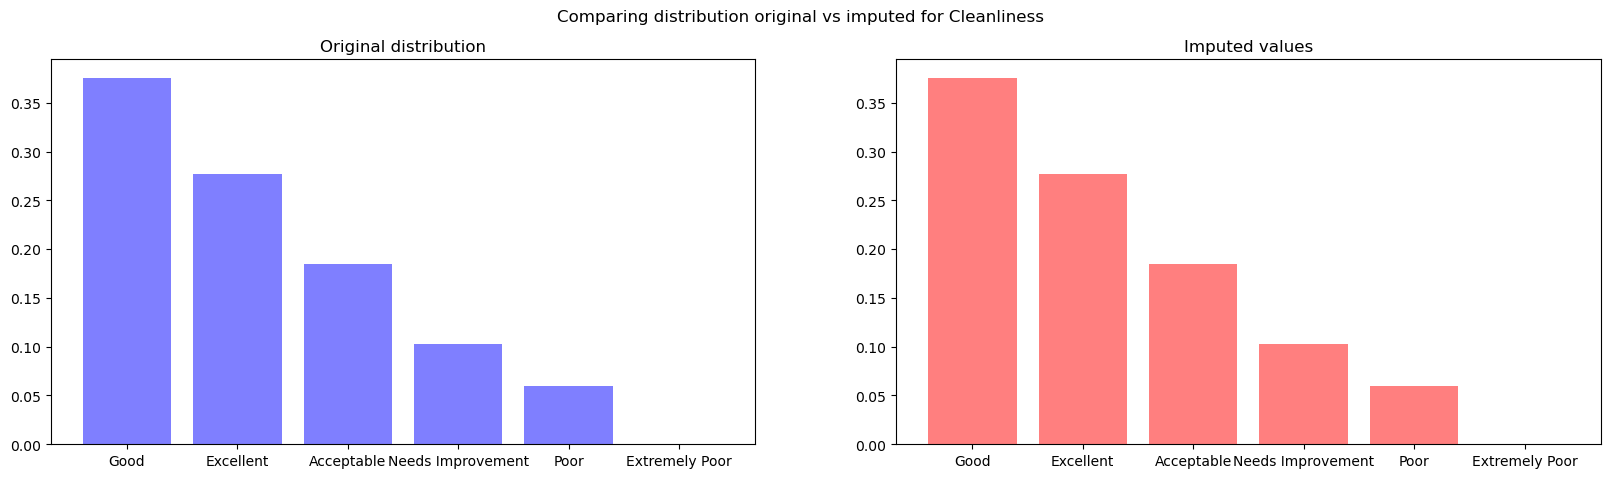

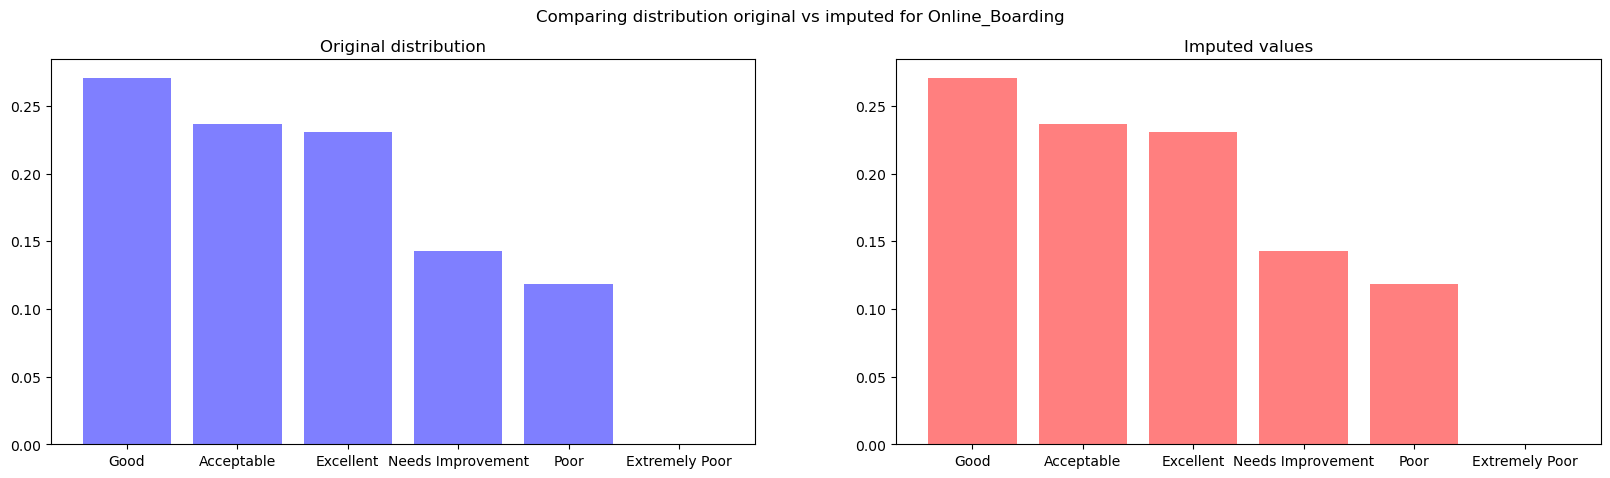

In [177]:
# Specify categorical columns to plot
categorical_columns_to_plot = ['Type_Travel', 'Customer_Type', 'Arrival_Time_Convenient', 'Catering', 
                               'Onboard_Service', 'Baggage_Handling', 'Online_Support', 'Legroom', 
                               'CheckIn_Service', 'Gender', 'Ease_of_Online_Booking', 'Seat_Comfort', 
                               'Onboard_Wifi_Service', 'Platform_Location', 'Onboard_Entertainment', 
                               'Cleanliness', 'Online_Boarding']  # or specify specific categorical columns

# Plot distributions for mode imputed data with transparency
plot_categorical_distribution(df, knn_imputed_data, categorical_columns_to_plot, 'Mode Imputed')

<h2> Hot Deck Imputation </h2>

In [178]:
import random

def hot_deck_impute(column):
    """Perform hot deck imputation by randomly sampling from the non-missing values."""
    non_missing_values = column.dropna().values
    return column.apply(lambda x: random.choice(non_missing_values) if pd.isna(x) else x)

In [179]:
# Apply Hot Deck Imputation
hot_deck_imputed_data = df.copy()
for col in categorical_columns:
    hot_deck_imputed_data[col] = hot_deck_impute(hot_deck_imputed_data[col])

In [182]:
hot_deck_imputed_data

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,train_test
0,98800001,0.0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,...,Poor,Female,Loyal Customer,52.0,Personal Travel,Business,272,0.0,5.0,train
1,98800002,0.0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,...,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,train
2,98800003,1.0,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,...,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,train
3,98800004,0.0,Acceptable,Ordinary,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Needs Improvement,Acceptable,...,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,train
4,98800005,1.0,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,...,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129976,99935598,1.0,Needs Improvement,Green Car,Excellent,Needs Improvement,Manageable,Acceptable,Needs Improvement,Acceptable,...,Acceptable,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0,test
129977,99935599,1.0,Needs Improvement,Ordinary,Needs Improvement,Good,Needs Improvement,Acceptable,Excellent,Excellent,...,Good,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0,test
129978,99935600,0.0,Good,Green Car,Extremely Poor,Good,Needs Improvement,Needs Improvement,Good,Poor,...,Needs Improvement,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0,test
129979,99935601,0.0,Excellent,Ordinary,Excellent,Excellent,Inconvenient,Acceptable,Excellent,Good,...,Good,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0,test


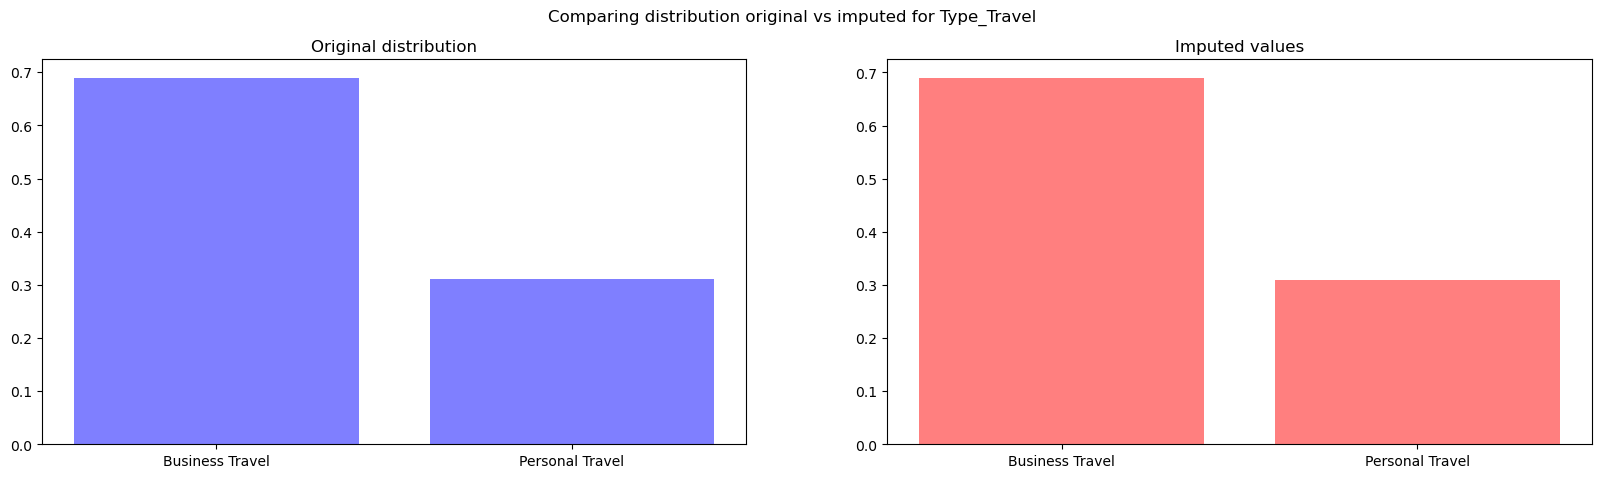

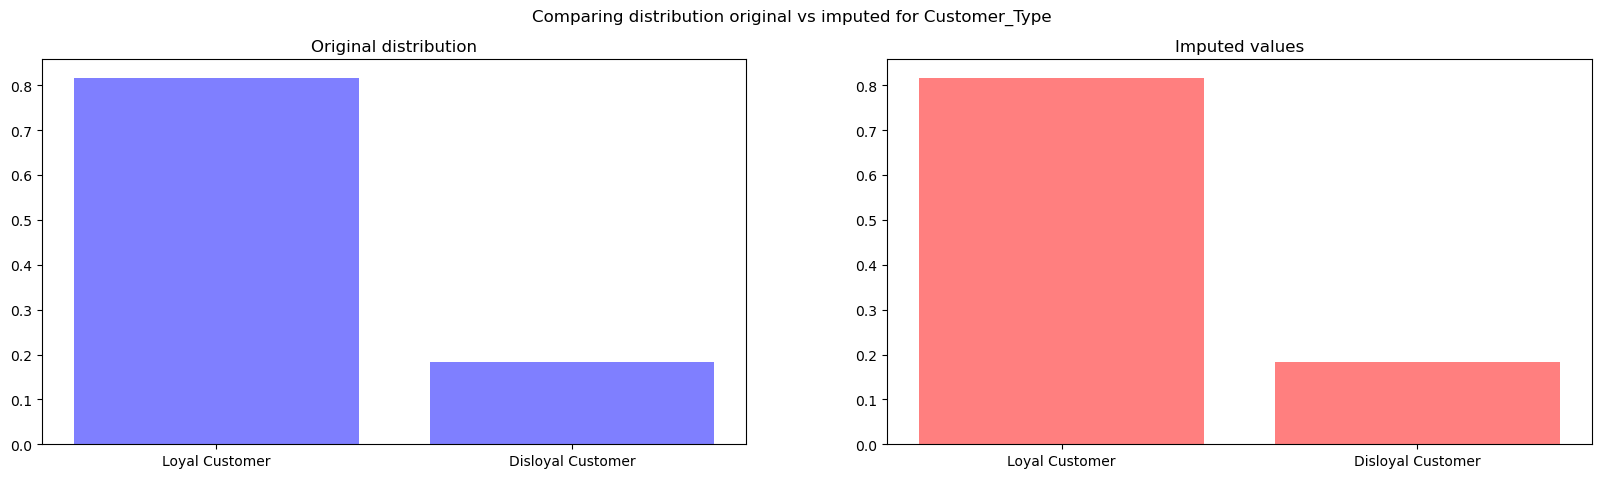

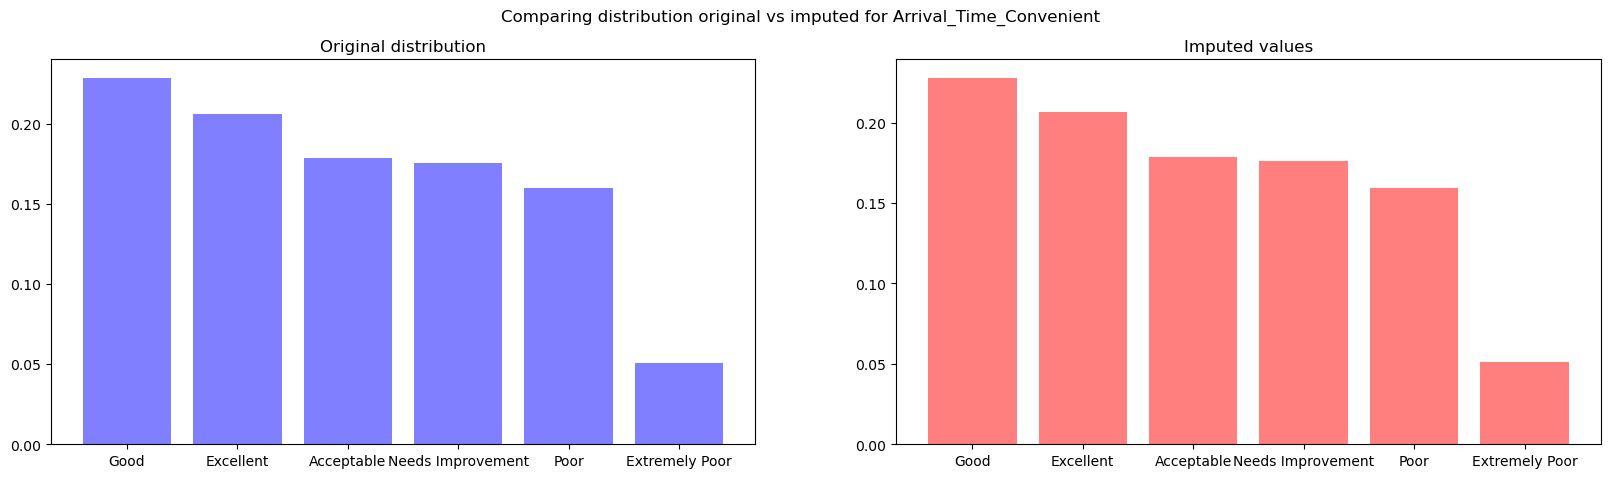

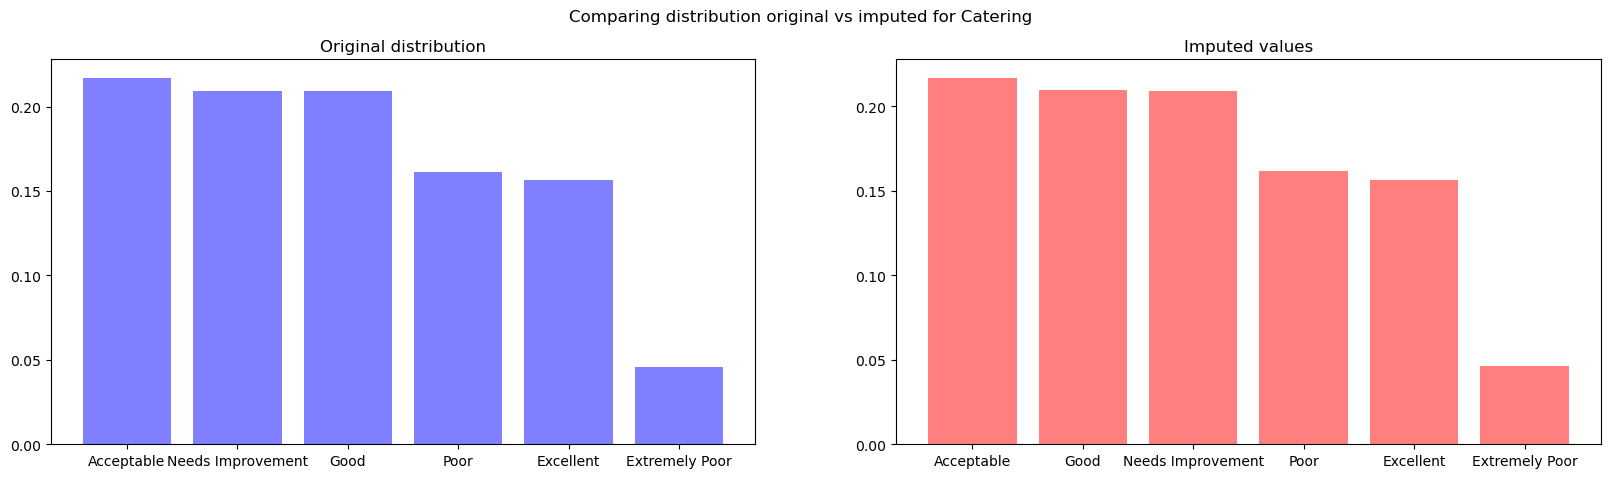

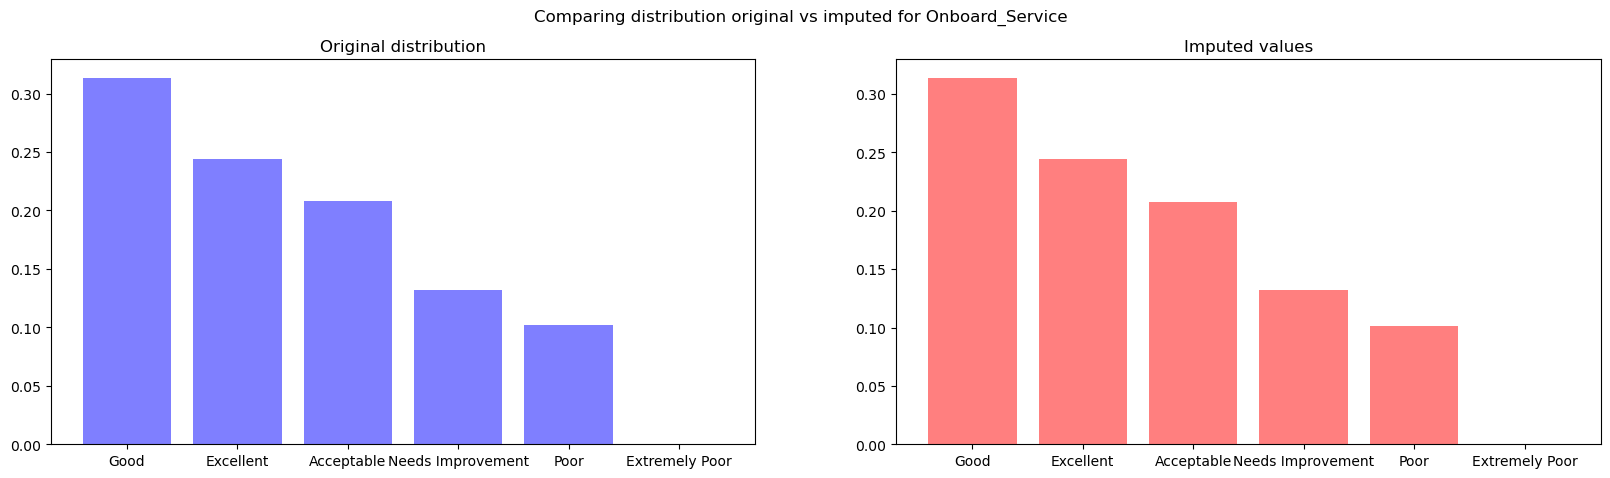

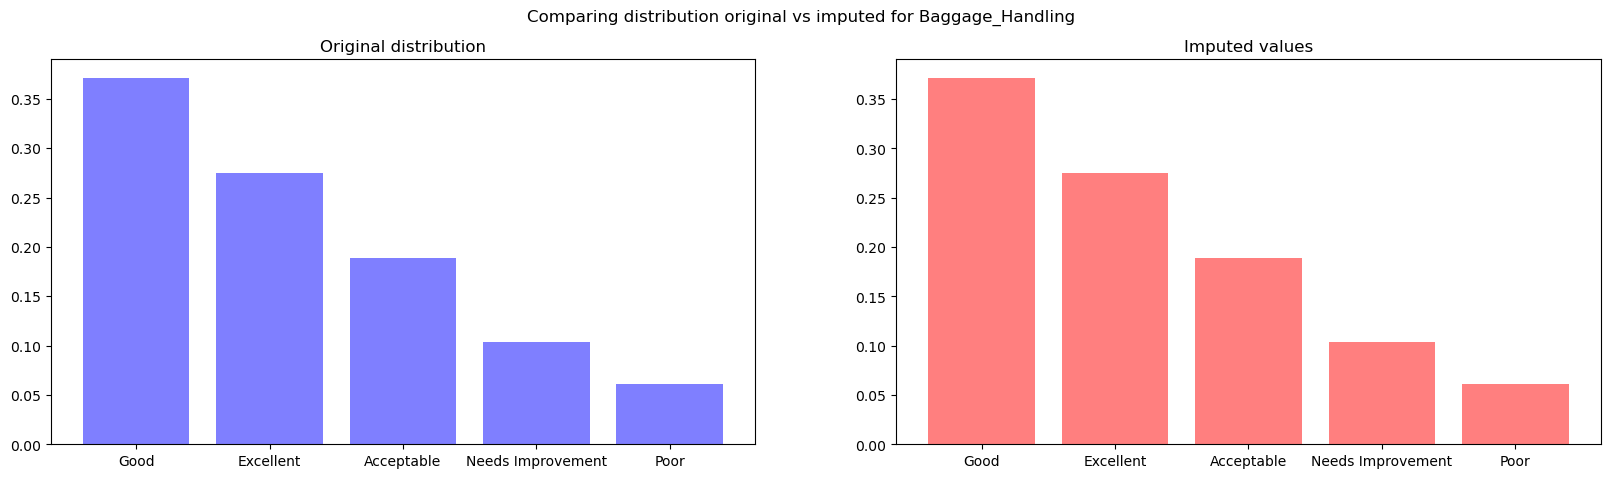

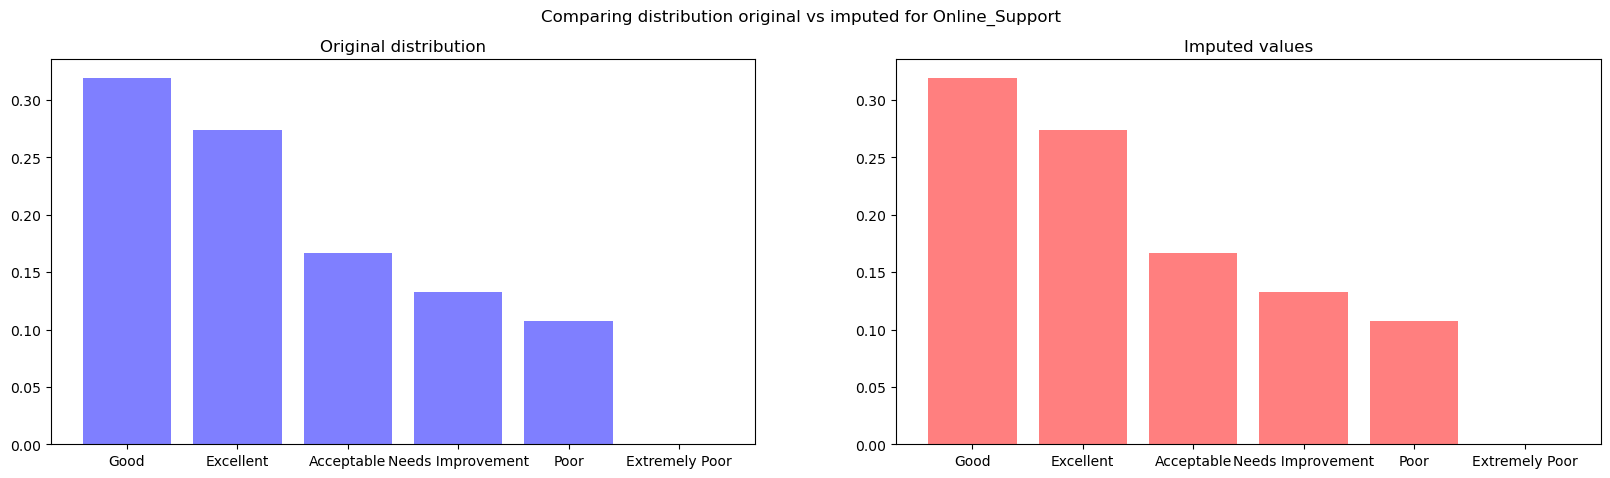

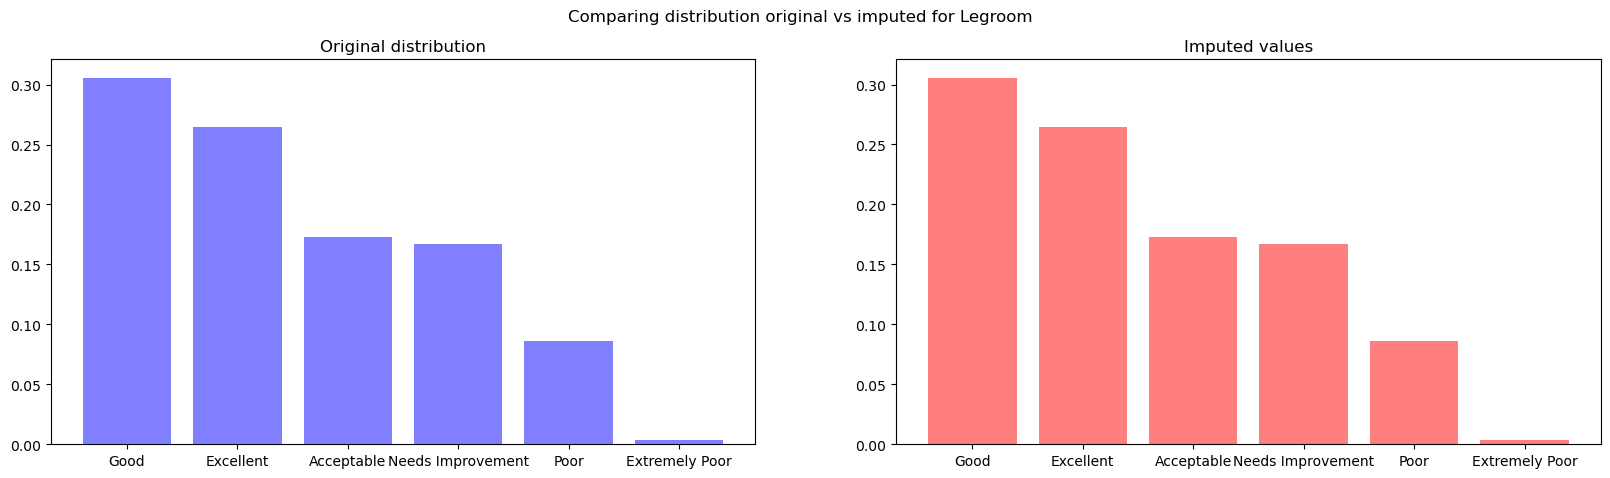

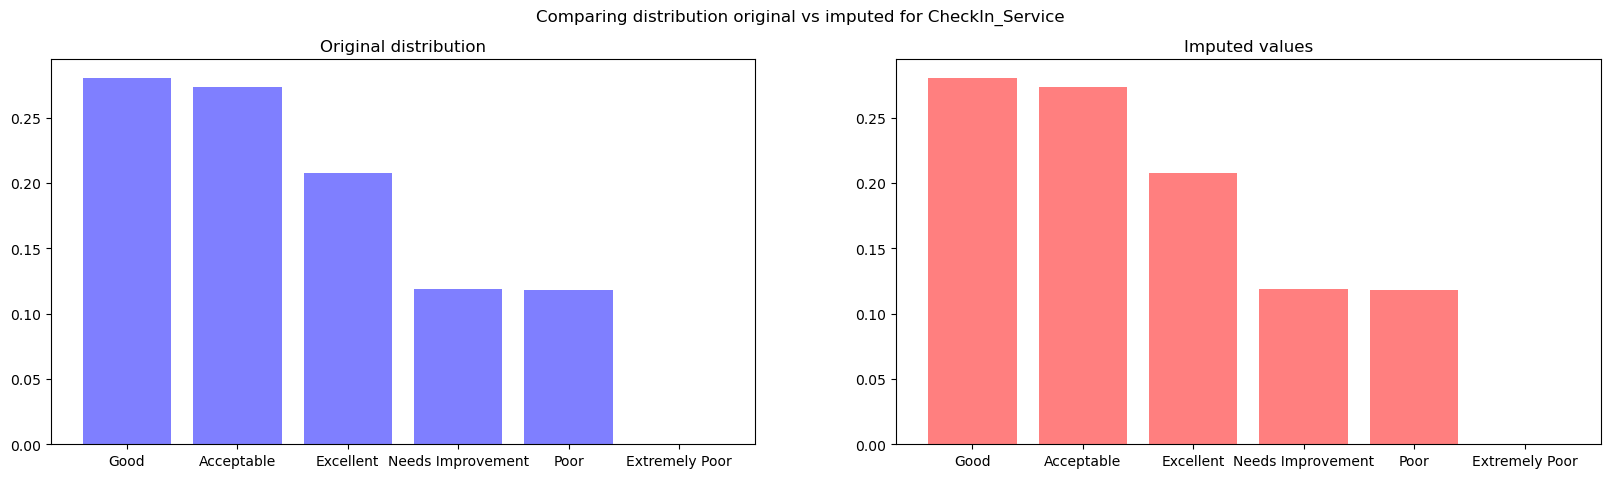

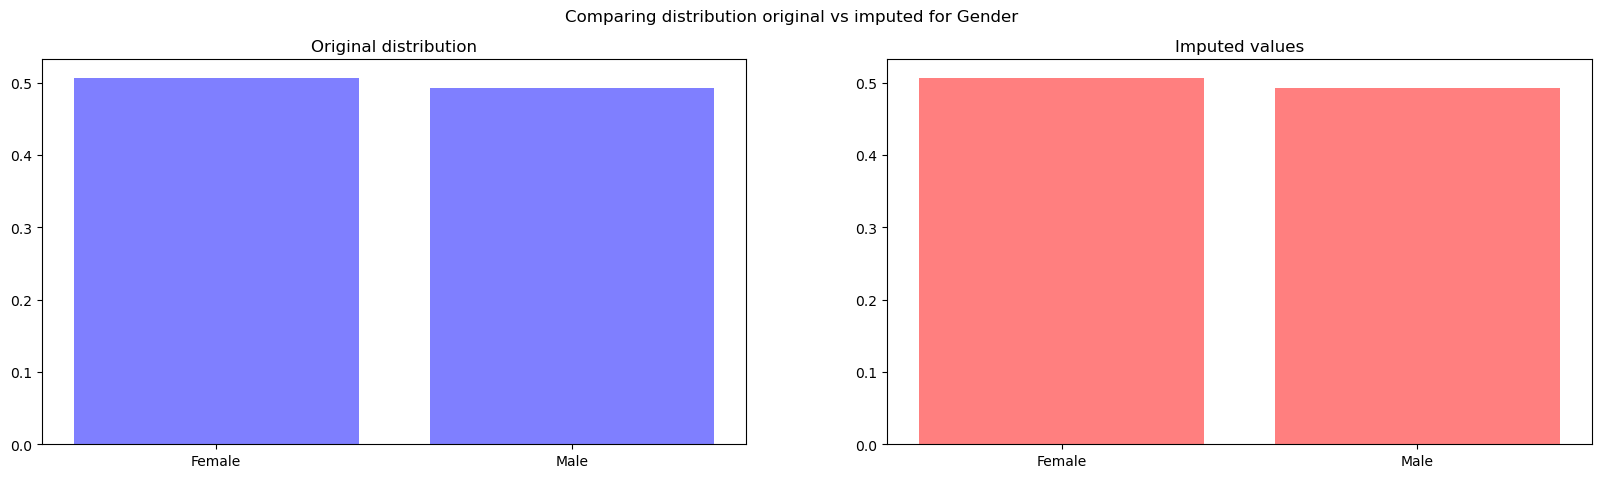

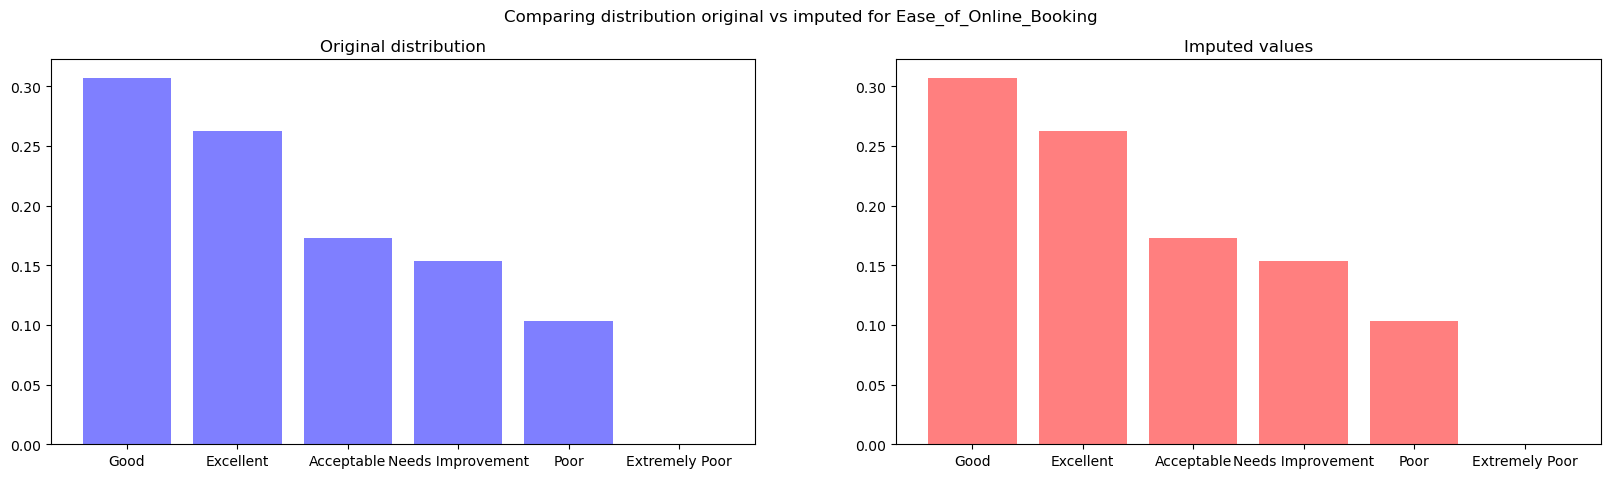

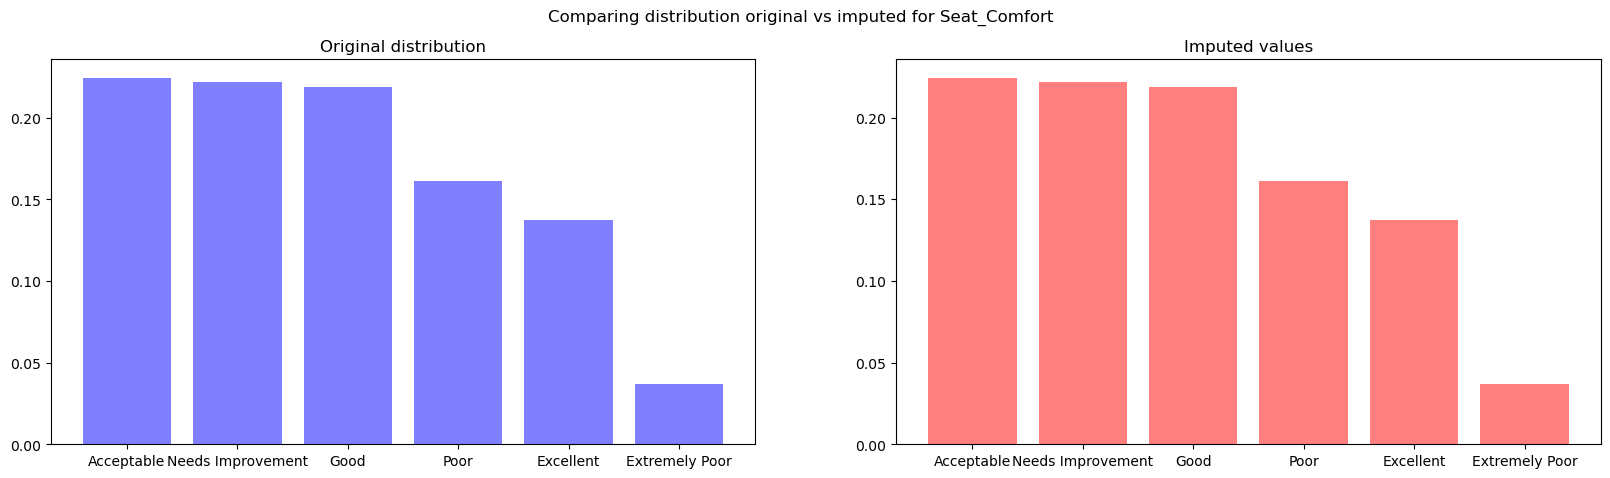

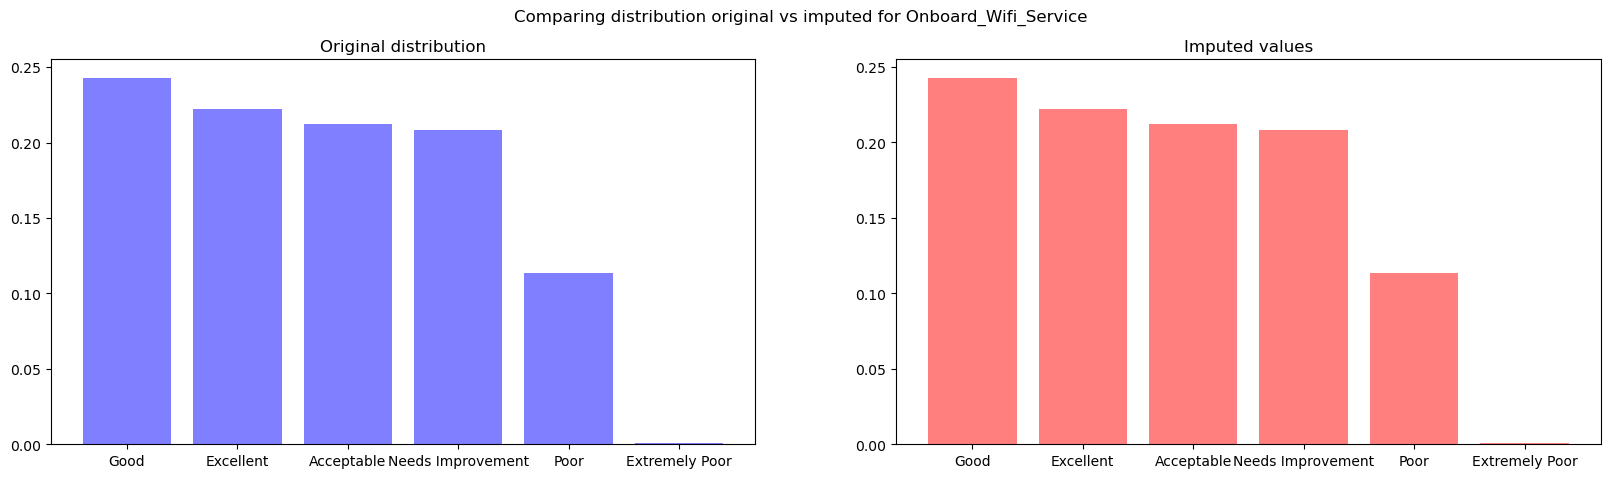

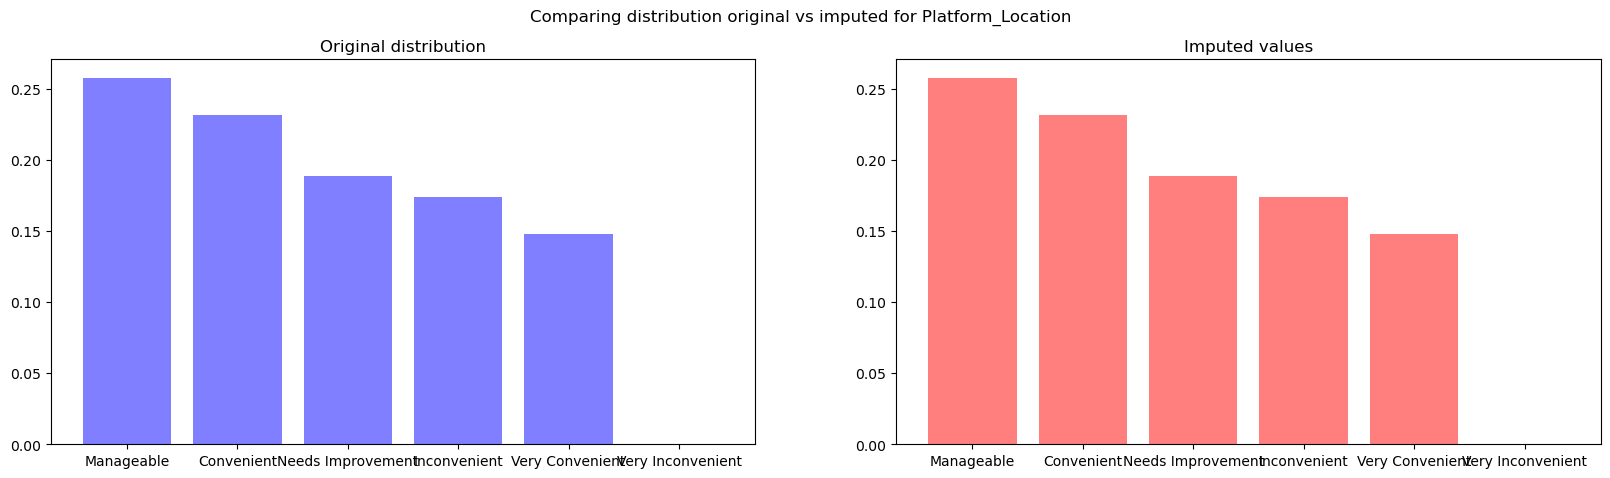

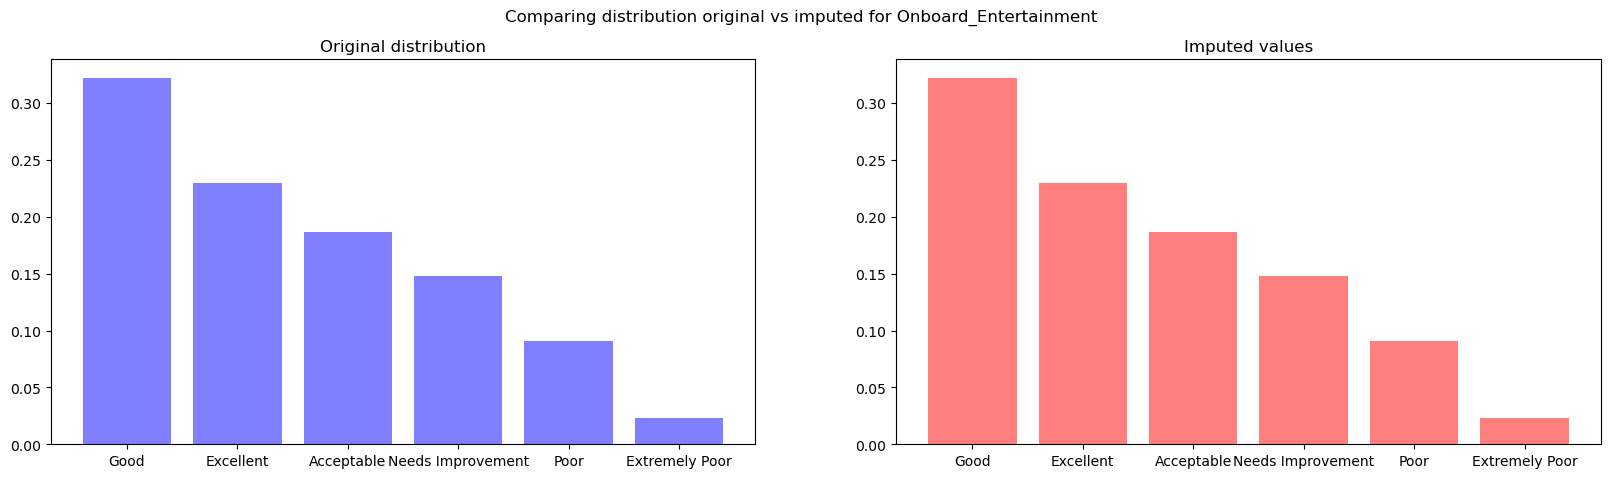

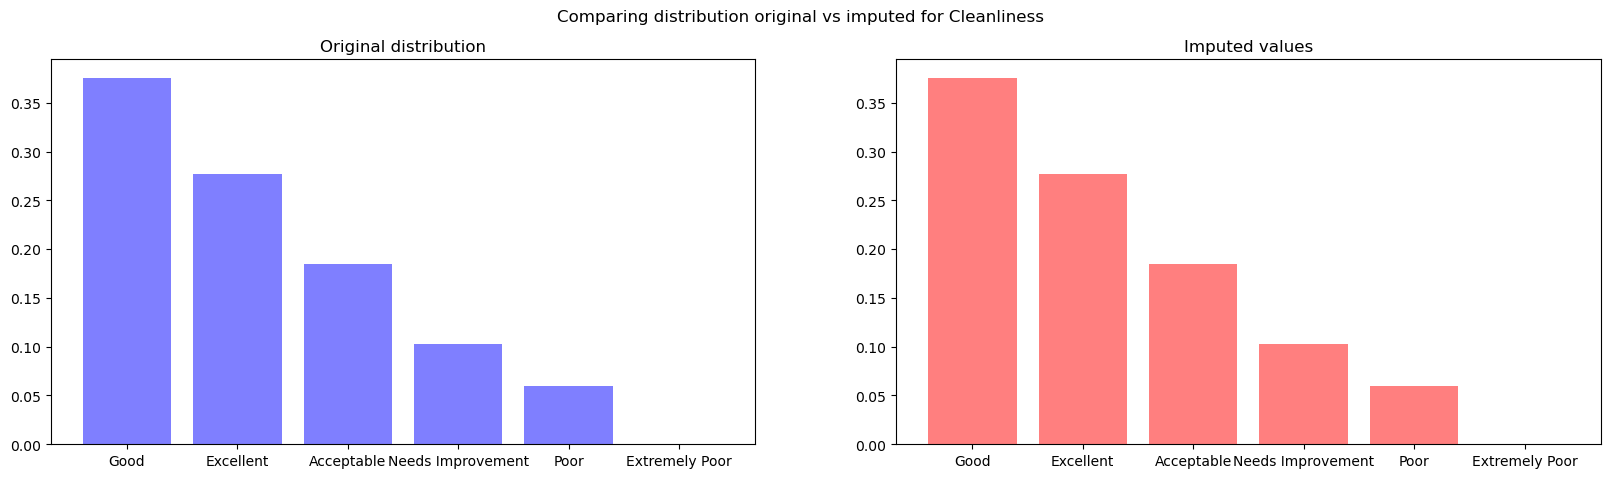

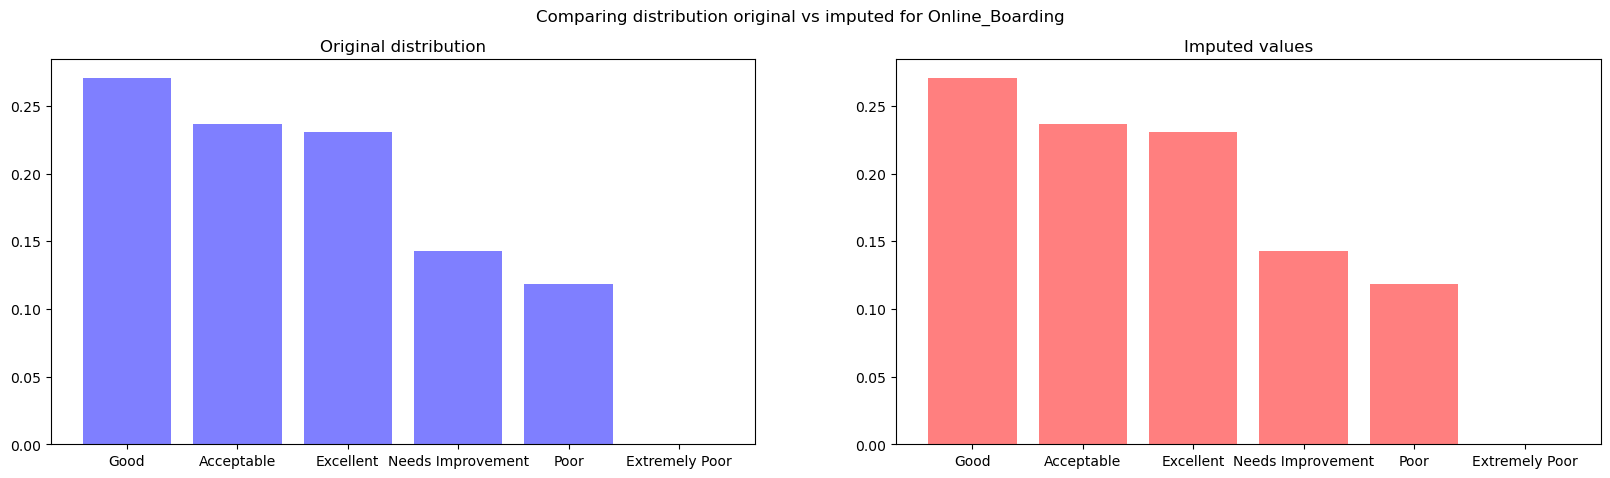

In [183]:
# Specify categorical columns to plot
categorical_columns_to_plot = ['Type_Travel', 'Customer_Type', 'Arrival_Time_Convenient', 'Catering', 
                               'Onboard_Service', 'Baggage_Handling', 'Online_Support', 'Legroom', 
                               'CheckIn_Service', 'Gender', 'Ease_of_Online_Booking', 'Seat_Comfort', 
                               'Onboard_Wifi_Service', 'Platform_Location', 'Onboard_Entertainment', 
                               'Cleanliness', 'Online_Boarding']  # or specify specific categorical columns

# Plot distributions for mode imputed data with transparency
plot_categorical_distribution(df, hot_deck_imputed_data, categorical_columns_to_plot, 'Mode Imputed')

<h2> Join imputations </h2>

In [184]:
imputed_df = pd.merge(mean_imputed_data[['ID'] + numerical_columns], hot_deck_imputed_data[['ID'] + categorical_columns], on='ID')

In [186]:
imputed_df['train_test'] = df['train_test']

train_df = imputed_df[imputed_df['train_test']=='train']
test_df = imputed_df[imputed_df['train_test']=='test']

<Axes: >

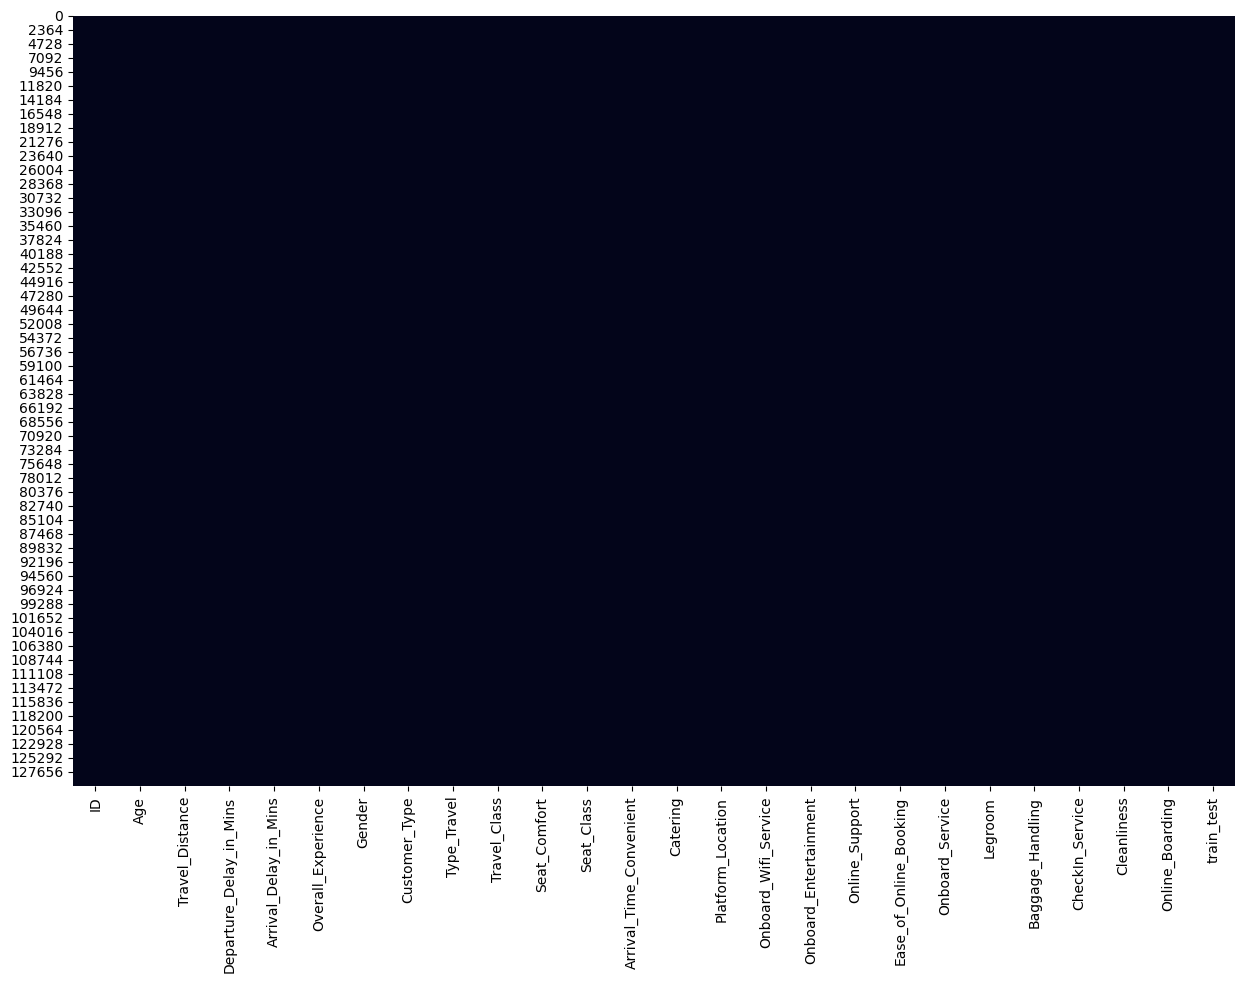

In [187]:
plt.figure(figsize=(15, 10))
sns.heatmap(imputed_df.isnull(), cbar=False)

In [188]:
train_df.drop('train_test', axis=1, inplace=True)
train_df.to_csv('../input/train/train_imputed_df.csv', sep=';', index=False)

In [189]:
test_df.drop('train_test', axis=1, inplace=True)
test_df.to_csv('../input/test/test_imputed_df.csv', sep=';', index=False)